In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
df= pd.read_pickle("../data/raw_data/pension_blog.pkl")

In [3]:
df.head()

title  \
0               국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   
1                국세체납 건강보험료 미납시 국민연금 연체 압류 어떻게 해결할까   
2            국세체납 건강보험료 미납 국민연금 연체 압류 등 세금 문제 해결하려면   
3       국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까   
4  개인사업자 사업자등록 건강보험료, 국민연금 납부는 어떻게? 주부 프리랜서의 변신 (1)   

                                                 doc like_cnt  \
0  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n​​해마다 매년 경제가 불...        4   
1  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n​​경제가 침체되다 보니 ...        5   
2  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n​우리나라 국민은 납세의 ...        8   
3  \n\n\n\n\n국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 ...        3   
4  \n\n\n\n\n사업자등록하면어떤 일이 벌어지는지 진짜알고 계신건가요?\n\n\n...       71   

                                        comment_cnt  \
0                                              null   
1                                              null   
2                                              null   
3                                              null   
4  \n\t\t\t\t\t\t\t\t\t\t\t26\n\t\t\t\t\t\t\t\t\t\t   

                                        comment_list img_cnt div_cnt  \
0                                               null      12       0   
1                                               null      12       0   
2                                               null      11       0   
3                                               null      14       0   
4  비밀 댓글입니다.\n지역가입자 전환되면 납부하는 보험료가 상당하다 하더라구요 ㅠㅠ\...       7       0   

  publish_date     ch   ch2  
0     20231201  naver  blog  
1     20231201  naver  blog  
2     20231201  naver  blog  
3     20231201  naver  blog  
4     20231201  naver  blog

In [4]:
df['publish_date']= pd.to_datetime(df['publish_date'], errors='coerce', utc=True)

# 한글화

In [5]:
import re
from tqdm import trange, notebook

In [6]:
# 제목, 본문, 댓글의 한글화
# 댓글 개수의 숫자화
for i in notebook.tqdm(range(len(df))):
    # title에서 영문 대소문자, 한글, 숫자, 공백 문자를 제외한 모든 문자를 삭제
    df['title'][i] = re.sub("[^0-9a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]", '', str(df['title'][i]))
    
    # doc에서 영문 대소문자, 한글, 숫자, 공백 문자를 제외한 모든 문자를 삭제
    df['doc'][i] = re.sub("[^0-9a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]", '', str(df['doc'][i]))

  0%|          | 0/24480 [00:00<?, ?it/s]

/tmp/ipykernel_30920/3388914019.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['title'][i] = re.sub("[^0-9a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]", '', str(df['title'][i]))
/tmp/ipykernel_30920/3388914019.py:5: SettingWithCopyWarning: 
A value is trying t

## **결측 값 drop**

In [7]:
for i in range(len(df)): # 본문
    if (len(df['doc'][i]) < 2 or df['doc'][i].isspace() == True) or (len(df['title'][i]) < 2 or df['title'][i].isspace() == True): # 문서 내용이 두글자 미만이나 공백문서로만 되있는 경우 결측값 처리
        df = df.drop(i) # 해당 행 삭제
print("ok")

ok


In [8]:
df= df.reset_index(drop=True)
df.head()

title  \
0           국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   
1            국세체납 건강보험료 미납시 국민연금 연체 압류 어떻게 해결할까   
2        국세체납 건강보험료 미납 국민연금 연체 압류 등 세금 문제 해결하려면   
3   국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까   
4  개인사업자 사업자등록 건강보험료 국민연금 납부는 어떻게 주부 프리랜서의 변신 1   

                                                 doc like_cnt  \
0  해마다 매년 경제가 불황이라는 뉴스가 나오는 것 같다고 했습니다 올해도 어김없이 마...        4   
1  경제가 침체되다 보니 생활비 부족뿐만 아니라 국세체납부터 시작해 각종 부분에서 연체...        5   
2  우리나라 국민은 납세의 의무를 이행해야 된다고 했습니다 그러나 국세체납 금액이 너무...        8   
3  국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까 경제...        3   
4  사업자등록하면어떤 일이 벌어지는지 진짜알고 계신건가요 개인사업자 준비중이신가요안녕하...       71   

                                        comment_cnt  \
0                                              null   
1                                              null   
2                                              null   
3                                              null   
4  \n\t\t\t\t\t\t\t\t\t\t\t26\n\t\t\t\t\t\t\t\t\t\t   

                                        comment_list img_cnt div_cnt  \
0                                               null      12       0   
1                                               null      12       0   
2                                               null      11       0   
3                                               null      14       0   
4  비밀 댓글입니다.\n지역가입자 전환되면 납부하는 보험료가 상당하다 하더라구요 ㅠㅠ\...       7       0   

               publish_date     ch   ch2  
0 2023-12-01 00:00:00+00:00  naver  blog  
1 2023-12-01 00:00:00+00:00  naver  blog  
2 2023-12-01 00:00:00+00:00  naver  blog  
3 2023-12-01 00:00:00+00:00  naver  blog  
4 2023-12-01 00:00:00+00:00  naver  blog

In [15]:
data= df.copy()

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
from tqdm import trange, notebook
import re # 정규표현식을 사용
warnings.filterwarnings(action='ignore')

In [ ]:
docs=df.copy()
# 제목, 본문, 댓글의 한글화
# 댓글 개수의 숫자화
for i in trange(len(docs)):
    # title에서 영문 대소문자, 한글, 숫자, 공백 문자를 제외한 모든 문자를 삭제
    docs['title'][i] = re.sub("[^0-9a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]", '', str(data['title'][i]))
    
    # doc에서 영문 대소문자, 한글, 숫자, 공백 문자를 제외한 모든 문자를 삭제
    docs['doc'][i] = re.sub("[^0-9a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]", '', str(data['doc'][i]))
    
    # comment_cnt에서 숫자를 제외한 모든 문자를 삭제
    docs['comment_cnt'][i] = re.sub("[^0-9]", "", str(docs['comment_cnt'][i]))
    
    # comment_list에서 영문 대소문자, 한글, 숫자, 공백 문자를 제외한 모든 문자를 삭제
    docs['comment_list'][i] = re.sub("[^0-9a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]", '', str(data['comment_list'][i]))
    
docs

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21557/21557 [00:16<00:00, 1276.39it/s]


title  \
0               국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   
1                국세체납 건강보험료 미납시 국민연금 연체 압류 어떻게 해결할까   
2            국세체납 건강보험료 미납 국민연금 연체 압류 등 세금 문제 해결하려면   
3       국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까   
4      개인사업자 사업자등록 건강보험료 국민연금 납부는 어떻게 주부 프리랜서의 변신 1   
...                                             ...   
21552                       기초노령연금 수급자격 금액 신청방법 주의점   
21553     노인기초연금 기초노령연금 재산 금액 부부 나이 감액 신청에 대해 알려주세요   
21554                                국민연금도 투자하는 부동산   
21555                  2023년 기초노령연금 신청 방법 수급자격 및 금액   
21556               국민연금공단 중소상공인 찾아가는 4대 사회보험 교육 실시   

                                                     doc like_cnt comment_cnt  \
0      해마다 매년 경제가 불황이라는 뉴스가 나오는 것 같다고 했습니다 올해도 어김없이 마...        4               
1      경제가 침체되다 보니 생활비 부족뿐만 아니라 국세체납부터 시작해 각종 부분에서 연체...        5               
2      우리나라 국민은 납세의 의무를 이행해야 된다고 했습니다 그러나 국세체납 금액이 너무...        8               
3      국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까 경제...        3               
4      사업자등록하면어떤 일이 벌어지는지 진짜알고 계신건가요 개인사업자 준비중이신가요안녕하...       71          26   
...                                                  ...      ...         ...   
21552  기초연금 수급자격 안녕하세요 재테크하는제인입니다오늘은 기초노령연금 수급자격과 금액 ...      151          14   
21553  노인기초연금 재산 금액 기초노령연금 나이 부부 신청 우리나라가 단기간에 급격히 성장...                   10   
21554  올해 5월 초에 국민연금이 러셀 사와 부동산 추종 인덱스를 런칭했다 투자금만 무려 ...                        
21555  요즘 들어 연금에 대한 포스팅이 부쩍이나 늘어난 것 같습니다 연금개혁에 앞서 연금 ...                   10   
21556   김윤태 기자국민연금공단은 24일 순천시를 시작으로 오는 6월29일 김해시까지 8개...                        

                                            comment_list img_cnt div_cnt  \
0                                                   null      12       0   
1                                                   null      12       0   
2                                                   null      11       0   
3                                                   null      14       0   
4      비밀 댓글입니다지역가입자 전환되면 납부하는 보험료가 상당하다 하더라구요 ㅠㅠ마음의 ...       7       0   
...                                                  ...     ...     ...   
21552  비밀 댓글입니다너무나 좋은정보 이네용기초노령연금 수급자격 도움 되시길 바래요좋은 정...       6       0   
21553  정성스런 포스팅 잘보고 갑니다좋은하루 되세요자세한 연금소식 감사합니다 어르신들의 고...       6       0   
21554                                                          2       0   
21555  오늘두 즐건 하루보내세요유용한 포스팅 잘 보고 갑니다 감사합니다들렸다 갑니다 이웃님...       7       0   
21556                                                          1       0   

                   publish_date     ch   ch2  
0     2023-12-01 00:00:00+00:00  naver  blog  
1     2023-12-01 00:00:00+00:00  naver  blog  
2     2023-12-01 00:00:00+00:00  naver  blog  
3     2023-12-01 00:00:00+00:00  naver  blog  
4     2023-12-01 00:00:00+00:00  naver  blog  
...                         ...    ...   ...  
21552 2023-05-01 00:00:00+00:00  naver  blog  
21553 2023-05-01 00:00:00+00:00  naver  blog  
21554 2023-05-01 00:00:00+00:00  naver  blog  
21555 2023-05-01 00:00:00+00:00  naver  blog  
21556 2023-05-01 00:00:00+00:00  naver  blog  

[21557 rows x 10 columns]

## 결측치 정리

In [19]:
for i in trange(len(docs)): # 본문
    if (len(docs['doc'][i]) < 2 or docs['doc'][i].isspace() == True): # 문서 내용이 두글자 미만이나 공백문서로만 되있는 경우 결측값 처리
        docs = docs.drop(i) # 해당 행 삭제
print("ok")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21557/21557 [00:00<00:00, 141172.06it/s]

ok


In [20]:
docs = docs.reset_index(drop=True) # 인덱스 재설정
docs

title  \
0               국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   
1                국세체납 건강보험료 미납시 국민연금 연체 압류 어떻게 해결할까   
2            국세체납 건강보험료 미납 국민연금 연체 압류 등 세금 문제 해결하려면   
3       국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까   
4      개인사업자 사업자등록 건강보험료 국민연금 납부는 어떻게 주부 프리랜서의 변신 1   
...                                             ...   
21552                       기초노령연금 수급자격 금액 신청방법 주의점   
21553     노인기초연금 기초노령연금 재산 금액 부부 나이 감액 신청에 대해 알려주세요   
21554                                국민연금도 투자하는 부동산   
21555                  2023년 기초노령연금 신청 방법 수급자격 및 금액   
21556               국민연금공단 중소상공인 찾아가는 4대 사회보험 교육 실시   

                                                     doc like_cnt comment_cnt  \
0      해마다 매년 경제가 불황이라는 뉴스가 나오는 것 같다고 했습니다 올해도 어김없이 마...        4               
1      경제가 침체되다 보니 생활비 부족뿐만 아니라 국세체납부터 시작해 각종 부분에서 연체...        5               
2      우리나라 국민은 납세의 의무를 이행해야 된다고 했습니다 그러나 국세체납 금액이 너무...        8               
3      국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까 경제...        3               
4      사업자등록하면어떤 일이 벌어지는지 진짜알고 계신건가요 개인사업자 준비중이신가요안녕하...       71          26   
...                                                  ...      ...         ...   
21552  기초연금 수급자격 안녕하세요 재테크하는제인입니다오늘은 기초노령연금 수급자격과 금액 ...      151          14   
21553  노인기초연금 재산 금액 기초노령연금 나이 부부 신청 우리나라가 단기간에 급격히 성장...                   10   
21554  올해 5월 초에 국민연금이 러셀 사와 부동산 추종 인덱스를 런칭했다 투자금만 무려 ...                        
21555  요즘 들어 연금에 대한 포스팅이 부쩍이나 늘어난 것 같습니다 연금개혁에 앞서 연금 ...                   10   
21556   김윤태 기자국민연금공단은 24일 순천시를 시작으로 오는 6월29일 김해시까지 8개...                        

                                            comment_list img_cnt div_cnt  \
0                                                   null      12       0   
1                                                   null      12       0   
2                                                   null      11       0   
3                                                   null      14       0   
4      비밀 댓글입니다지역가입자 전환되면 납부하는 보험료가 상당하다 하더라구요 ㅠㅠ마음의 ...       7       0   
...                                                  ...     ...     ...   
21552  비밀 댓글입니다너무나 좋은정보 이네용기초노령연금 수급자격 도움 되시길 바래요좋은 정...       6       0   
21553  정성스런 포스팅 잘보고 갑니다좋은하루 되세요자세한 연금소식 감사합니다 어르신들의 고...       6       0   
21554                                                          2       0   
21555  오늘두 즐건 하루보내세요유용한 포스팅 잘 보고 갑니다 감사합니다들렸다 갑니다 이웃님...       7       0   
21556                                                          1       0   

                   publish_date     ch   ch2  
0     2023-12-01 00:00:00+00:00  naver  blog  
1     2023-12-01 00:00:00+00:00  naver  blog  
2     2023-12-01 00:00:00+00:00  naver  blog  
3     2023-12-01 00:00:00+00:00  naver  blog  
4     2023-12-01 00:00:00+00:00  naver  blog  
...                         ...    ...   ...  
21552 2023-05-01 00:00:00+00:00  naver  blog  
21553 2023-05-01 00:00:00+00:00  naver  blog  
21554 2023-05-01 00:00:00+00:00  naver  blog  
21555 2023-05-01 00:00:00+00:00  naver  blog  
21556 2023-05-01 00:00:00+00:00  naver  blog  

[21557 rows x 10 columns]

In [25]:
# like, comment_cnt, img, div의 데이터 타입을 숫자로 변환
# 변환 중 에러 발생시 NaN으로 처리
docs['comment_cnt'] = pd.to_numeric(docs['comment_cnt'], errors='coerce').astype('Int64')
docs['img_cnt'] = pd.to_numeric(docs['img_cnt'], errors='coerce').astype('Int64')
docs['div_cnt'] = pd.to_numeric(docs['div_cnt'], errors='coerce').astype('Int64')

docs

title  \
0               국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   
1                국세체납 건강보험료 미납시 국민연금 연체 압류 어떻게 해결할까   
2            국세체납 건강보험료 미납 국민연금 연체 압류 등 세금 문제 해결하려면   
3       국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까   
4      개인사업자 사업자등록 건강보험료 국민연금 납부는 어떻게 주부 프리랜서의 변신 1   
...                                             ...   
21552                       기초노령연금 수급자격 금액 신청방법 주의점   
21553     노인기초연금 기초노령연금 재산 금액 부부 나이 감액 신청에 대해 알려주세요   
21554                                국민연금도 투자하는 부동산   
21555                  2023년 기초노령연금 신청 방법 수급자격 및 금액   
21556               국민연금공단 중소상공인 찾아가는 4대 사회보험 교육 실시   

                                                     doc like_cnt  \
0      해마다 매년 경제가 불황이라는 뉴스가 나오는 것 같다고 했습니다 올해도 어김없이 마...        4   
1      경제가 침체되다 보니 생활비 부족뿐만 아니라 국세체납부터 시작해 각종 부분에서 연체...        5   
2      우리나라 국민은 납세의 의무를 이행해야 된다고 했습니다 그러나 국세체납 금액이 너무...        8   
3      국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까 경제...        3   
4      사업자등록하면어떤 일이 벌어지는지 진짜알고 계신건가요 개인사업자 준비중이신가요안녕하...       71   
...                                                  ...      ...   
21552  기초연금 수급자격 안녕하세요 재테크하는제인입니다오늘은 기초노령연금 수급자격과 금액 ...      151   
21553  노인기초연금 재산 금액 기초노령연금 나이 부부 신청 우리나라가 단기간에 급격히 성장...            
21554  올해 5월 초에 국민연금이 러셀 사와 부동산 추종 인덱스를 런칭했다 투자금만 무려 ...            
21555  요즘 들어 연금에 대한 포스팅이 부쩍이나 늘어난 것 같습니다 연금개혁에 앞서 연금 ...            
21556   김윤태 기자국민연금공단은 24일 순천시를 시작으로 오는 6월29일 김해시까지 8개...            

       comment_cnt                                       comment_list  \
0             <NA>                                               null   
1             <NA>                                               null   
2             <NA>                                               null   
3             <NA>                                               null   
4               26  비밀 댓글입니다지역가입자 전환되면 납부하는 보험료가 상당하다 하더라구요 ㅠㅠ마음의 ...   
...            ...                                                ...   
21552           14  비밀 댓글입니다너무나 좋은정보 이네용기초노령연금 수급자격 도움 되시길 바래요좋은 정...   
21553           10  정성스런 포스팅 잘보고 갑니다좋은하루 되세요자세한 연금소식 감사합니다 어르신들의 고...   
21554         <NA>                                                      
21555           10  오늘두 즐건 하루보내세요유용한 포스팅 잘 보고 갑니다 감사합니다들렸다 갑니다 이웃님...   
21556         <NA>                                                      

       img_cnt  div_cnt              publish_date     ch   ch2  img  
0           12        0 2023-12-01 00:00:00+00:00  naver  blog   12  
1           12        0 2023-12-01 00:00:00+00:00  naver  blog   12  
2           11        0 2023-12-01 00:00:00+00:00  naver  blog   11  
3           14        0 2023-12-01 00:00:00+00:00  naver  blog   14  
4            7        0 2023-12-01 00:00:00+00:00  naver  blog    7  
...        ...      ...                       ...    ...   ...  ...  
21552        6        0 2023-05-01 00:00:00+00:00  naver  blog    6  
21553        6        0 2023-05-01 00:00:00+00:00  naver  blog    6  
21554        2        0 2023-05-01 00:00:00+00:00  naver  blog    2  
21555        7        0 2023-05-01 00:00:00+00:00  naver  blog    7  
21556        1        0 2023-05-01 00:00:00+00:00  naver  blog    1  

[21557 rows x 11 columns]

In [26]:
from tqdm import tqdm # 반복문, 반복작업과정의 진행상황을 시각적으로 제시
from konlpy.tag import Komoran # 한국어 형태소 분석을 위해 konlpy 로부터 Komoran 클래스를 import
komoran = Komoran() # Komoran 클래스의 인스턴스 생성

## **제목 토큰화**

In [27]:
title_token_list = [] # 제목의 형태소를 담아낼 리스트
title_token_noun = [] # 제목의 명사를 담아낼 리스트
for i in trange(len(docs)):
    # komoran.pos() 메서드를 사용하여 형태소 분석 실시
    pos = komoran.pos(u'{}'.format(docs['title'][i])) 
    
    # komoran.nouns() 메서드를 사용하여 길이가 2이상인 명사를 추출라고 리스트에 저장
    noun = list(term for term in komoran.nouns(u'{}'.format(docs['title'][i])) if len(term) >1)
    
    title_token_list.append(pos) # 형태소 분석결과를 리스트에 추가
    title_token_noun.append(noun) # 추출한 명사를 리스트에 추가

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21557/21557 [00:10<00:00, 2115.49it/s]


## **본문 토큰화**

In [28]:
doc_token_list = [] # 본문의 형태소를 담아낼 리스트
doc_token_noun = [] # 본문의 명사를 담아낼 리스트
for i in trange(len(docs)):    
    # komoran.pos() 메서드를 사용하여 형태소 분석 결과
    pos = komoran.pos(u'{}'.format(docs['doc'][i]))
    
    # komoran.nouns() 메서드를 사용하여 명사만 추출, 길이가 2 이상인 명사만 리스트에 저장
    noun = list(term for term in komoran.nouns(u'{}'.format(docs['doc'][i])) if len(term) >1)
    
    doc_token_list.append(pos) # 형태소 분석결과를 리스트에 추가
    doc_token_noun.append(noun) # 추출한 명사를 리스트에 추가

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21557/21557 [30:08<00:00, 11.92it/s]


## **댓글 토큰화**

In [29]:
comment_token_list = [] # 본문의 형태소를 담아낼 리스트
comment_token_noun = [] # 본문의 명사를 담아낼 리스트
for i in trange(len(docs)):
    
    # komoran.pos() 메서드를 사용하여 형태소 분석 결과
    pos = komoran.pos(u'{}'.format(docs['comment_list'][i]))
    
    # komoran.nouns() 메서드를 사용하여 명사만 추출, 길이가 2 이상인 명사만 리스트에 저장
    noun = list(term for term in komoran.nouns(u'{}'.format(docs['comment_list'][i])) if len(term) >1)
    
    comment_token_list.append(pos) # 형태소 분석결과를 리스트에 추가
    comment_token_noun.append(noun) # 추출한 명사를 리스트에 추가

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21557/21557 [04:43<00:00, 76.11it/s]


## **불용어처리**

In [ ]:
f = open("../data/stopwords-ko.txt", "r", encoding = "UTF-8") #  UTF-8으로 저장된 한글 불용어 파일 읽어들여오기
st = f.readlines()  # 불용어가 줄단위로 저장된 리스트
f.close()

In [35]:
stw = []
for i in notebook.tqdm(range(len(st))):
    stw.append(st[i].rstrip('\n')) # st리스트에서 '\n' 제거

  0%|          | 0/679 [00:00<?, ?it/s]

In [36]:


user_stopwords = ['국민연금','현장','배정','정기','주주총회','개막','시즌','있다','주총','한도','승인','안건','부회장','여부','논란','이슈','전망','열기','주주',
                  '장시간','질의','위기감','대응','주주','경계','사업','상대로','비교','예년','주목','이슈','예정','이데일리','기사','신혜선','오전','오후',
                  '서울','용산','연금','수령','방법','납부','신청','보험료','국민연금공단','가입','조회','소득','경우','금액','기간','기준','만원','가입자','수급',
                  '지급','제도','노후','노령','때문','니다','확인','개월','이후','나이','본인','정보','연령','보장','오늘','일시','자격','조건','미만','댓글','비밀',
                  '감사','안녕하세요','블로그','가요','공감','화이팅','날씨','즐거운 하루','편안','저녁','제가','마무리','답방','응원','지금','말씀','요즘','감기',
                  '정도','기분','해주시','덕분','오후','나중','설명','고맙습니다','조회','월요일','금요일','필요','국민','내용','KBS 뉴스','한국','올해','장관',
                  '필요','대통령','오늘','추진','개최','뉴스','최대','반대','논의','내년','기자','양희','사유','실시','계획','하나로','7월 1일','대상','최대','이다',
                  '웨딩','재생','부산','신부','설정','해상도','사용','컨벤션','사진','준비','생각','대기실','느낌','자막','기본','소거','안함','도움말','투어',
                  '진행','주차','뷔페','영상','취소','결혼','위치','에메랄드','보내기','지도','공유','발생','고딕','사람','480p','변경','예식','전체','마음','계약',
                  '파티','상태','이용','하객','부동산','예약','카드','광고','시도', '크기','배포','금지','전재','무단','사장','오늘', '생각', '기준', '지역','사이트','회원','다운','추가',
                  '완성','포인트','다운로드','충전','신규','제휴','작성','이벤트','저도','바우','해주','아래','링크','자가','해주시','등록','특례',
                  '네이버','구부','다이','이얼','마나','한일','서로','이다','현재','해서','댓글','하기','니다','이하','안녕하세요','해도','오늘','하면',
                  '카페','고맙습니다','이고','제가','내세','가요','만세','이노','때문','블로그','블로거','카페','만원','보내기','준비', '후기', '정리', '경력', 
                  '부탁', '이혼', '햇살', '주차', '공유', '필기', '면접', '공고', '가입', '관련', '방법', '문의', '확인', '신청', '수급', '계획', '경우', '부탁', 
                  '변경', '조희', '기간', '주차', '처리', '공유', '적용', '면접','오늘', '생각', '기준', '지역','사이트','회원','다운','추가','완성','포인트',
                  '다운로드','충전','신규','제휴','작성','이벤트',
                  '저도','바우','해주','아래','링크','자가','해주시','등록',
                  '네이버','구부','다이','이얼','마나','한일','서로','이다','현재',
                  '해서','댓글','하기','니다','이하','안녕하세요','해도','오늘','하면',
                  '카페','고맙습니다','이고','제가','내세','가요','만세','이노','때문',
                  '블로그','블로거','카페','만원','보내기','준비', '후기', '정리', 
                  '부탁', '이혼', '햇살', '주차', '공유', '필기', '면접', '공고', '가입', 
                  '관련', '방법', '문의', '확인', '신청', '수급', '계획', '경우', '부탁', 
                  '변경', '조희', '기간', '주차', '처리', '공유', '적용', '면접','마찬가지','여기저기','최근','내야','당연','사실','인해','내야',
                  '예외','복사','허용','글자','옵션','파일','컴퓨터','저장','게시','저작권','작성자','도용','복제','삼성','스토어','용인','프로모션',
                  '더보','본점','주년','오류']


stw.extend(user_stopwords)

In [37]:
for word in notebook.tqdm(stw):
    for i in range(0, len(title_token_noun)):
        # 리스트에 불용어가 있을 경우 제거
        while word in title_token_noun[i]:
            title_token_noun[i].remove(word)
        while word in doc_token_noun[i]:
            doc_token_noun[i].remove(word)
        while word in comment_token_noun[i]:
            comment_token_noun[i].remove(word)

  0%|          | 0/1067 [00:00<?, ?it/s]

In [38]:
# 문서파일 docs로 적용하여 각각의 불용어 제거 
docs['title_token_list_pos'] = title_token_list  # 형태소와 품사 리스트 
docs['title_token_noun'] = title_token_noun      # 명사 리스트
docs['doc_token_noun'] = doc_token_noun
docs['doc_token_list_pos'] = doc_token_list
docs['comment_token_list_pos'] = comment_token_list
docs['comment_token_noun'] = comment_token_noun

In [39]:
import pickle
f = open("blog_total_doc.pkl", "wb") # total_doc.pkl로 저장
pickle.dump(docs, f)
f.close()

## **텍스트 마이닝**

In [ ]:
data= pd.read_pickle("../data/analysis_data/blog/blog_total_doc.pkl")

## 제목 데이터 frequency count

In [42]:
import itertools # 문서의 명사 리스트 확보
noun = list(itertools.chain(*data['title_token_noun'])) # 리스트 접합
noun

['국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '고민',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '해결',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '세금',
 '문제',
 '해결',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '개인',
 '회생',
 '세금',
 '면책',
 '개인',
 '사업자',
 '사업자',
 '건강',
 '주부',
 '프리랜서',
 '변신',
 '감액',
 '해결',
 '재개',
 '정부',
 '지원',
 '연간',
 '시뮬레이션',
 '개인연금',
 '조기',
 '예상',
 '유예',
 '주의',
 '사항',
 '반환',
 '전략',
 '개인연금',
 '활용',
 '유족',
 '가지',
 '예상',
 '계산',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '세금',
 '연체',
 '해결',
 '예상',
 '주부',
 '조기',
 '장단점',
 '예상',
 '기초',
 '조기',
 '기초',
 '인상',
 '감액',
 '계산',
 '고갈',
 '인공지능',
 '대답',
 '인상률',
 '물가',
 '상승',
 '정정',
 '조기',
 '조기',
 '서류',
 '예상',
 '연기',
 '조기',
 '베이스',
 '투자',
 '수익률',
 '지급액',
 '대체',
 '10년',
 '10억',
 '도전',
 '개인연금',
 '퇴직',
 '부부',
 '유족',
 '실버',
 '대출',
 '금리',
 '조기',
 '감액',
 '이득',
 '예상',
 '재무',
 '설계',
 '단추',
 '예상',
 '예상',
 '정책',
 '방향',
 '2024년',
 '연기',
 '조기',
 '청년',
 '청년',
 '재단',
 '토의',
 '참여',
 '청년',
 '김준호',
 '단계',
 '이유',
 '평균',
 '프리랜서',
 '부담',
 '활용',
 '지원',
 '지급액',
 '소개'

In [43]:
from collections import Counter
count = Counter(noun) # 각 문자가 몇 번 나타나는지 알려주는 객체 반환

In [44]:
top = dict(count.most_common(500)) # 상위 500개 출력
top

{'예상': 1142,
 '개혁': 1129,
 '조기': 1095,
 '보험': 984,
 '기초': 924,
 '인상': 872,
 '건강보험': 735,
 '고갈': 696,
 '지원': 618,
 '투자': 606,
 '증명서': 547,
 '퇴직': 532,
 '경제': 502,
 '신고': 459,
 '발급': 450,
 '건강': 446,
 '분할': 442,
 '공무원': 441,
 '납입': 427,
 '수익률': 410,
 '해지': 403,
 '크레딧': 395,
 '계산': 392,
 '미납': 389,
 '실업': 385,
 '주식': 360,
 '재산': 339,
 '유족': 335,
 '개인연금': 329,
 '고용': 329,
 '기금': 329,
 '이유': 304,
 '임의': 301,
 '저축': 299,
 '개인': 296,
 '세금': 294,
 '급여': 291,
 '채용': 268,
 '공제': 265,
 '운용': 260,
 '7월': 257,
 '체납': 246,
 '유예': 245,
 '사회': 237,
 '감액': 231,
 '합격': 227,
 '주택': 226,
 '서류': 222,
 '안내': 222,
 '퇴사': 220,
 '시기': 218,
 '연체': 215,
 '가지': 211,
 '해외': 211,
 '압류': 210,
 '반환': 210,
 '공단': 207,
 '손실': 203,
 '장애': 197,
 '신문': 196,
 '교육': 191,
 '종합': 189,
 '소득세': 184,
 '종류': 183,
 '은퇴': 183,
 '사업장': 183,
 '대체': 182,
 '사업자': 180,
 '세대': 180,
 '관리': 180,
 '혜택': 179,
 '사학': 179,
 '지사': 177,
 '미국': 174,
 '환급': 174,
 '부부': 173,
 '인턴': 172,
 '홍보': 171,
 '근로자': 170,
 '조정': 169,
 '요율': 162,
 '대비': 160,
 

In [ ]:
# csv 파일로 저장
import csv

with open("../data/analysis_data/blog/제목 top500.csv", 'w', newline = '') as file:
    writer = csv.writer(file)
    for k, v in top.items():
        writer.writerow([k, v])

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

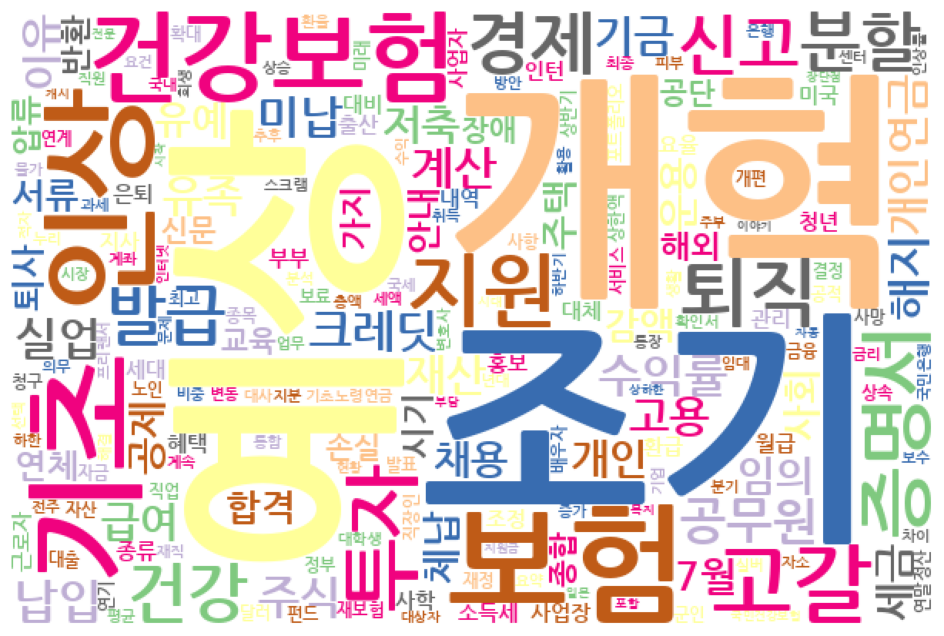

In [ ]:
# 글씨체 위치 지정
file_path='./'
wordcloud = WordCloud(font_path ='../data/NanumGothicBold.ttf', background_color = 'white', colormap = "Accent", width = 600, height = 400).generate_from_frequencies(top)
plt.figure(figsize=(12,8))   # 보여지는 크기 지정
plt.imshow(wordcloud) # 이미지 표시
plt.axis('off') #눈금 제거
plt.show()

### **본문 데이터 마이닝**

In [48]:
import itertools # 문서의 명사 리스트 확보
noun = list(itertools.chain(*data['doc_token_noun'])) # 리스트 접합
noun

['경제',
 '불황',
 '경기',
 '코로나',
 '자영업자',
 '기업',
 '회사',
 '구조조정',
 '최악',
 '상황',
 '실직',
 '위기',
 '가계부채',
 '문제',
 '어려움',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '문제',
 '고민',
 '도움',
 '대출금',
 '의무',
 '세금',
 '국세',
 '체납',
 '고통',
 '대한민국',
 '세납',
 '의무',
 '언급',
 '경기',
 '가계',
 '경제',
 '비상',
 '세금',
 '건강',
 '미납',
 '병원',
 '연체',
 '압류',
 '압박',
 '문제',
 '세금',
 '거주',
 '상가',
 '오피스텔',
 '소유',
 '재산세',
 '성실',
 '소유',
 '상가',
 '양도소득세',
 '다라',
 '고지',
 '의문',
 '무시',
 '지속',
 '세금',
 '양도소득세',
 '다라',
 '자체',
 '세금',
 '국세',
 '체납',
 '장기',
 '압류',
 '고지',
 '체납',
 '국세',
 '장기',
 '국내',
 '행동',
 '세금',
 '지식',
 '납세',
 '의무',
 '이유',
 '외면',
 '국세',
 '체납',
 '처음',
 '가산세',
 '벌금',
 '거부',
 '국세청',
 '국세',
 '회수',
 '해당',
 '자산',
 '압류',
 '조치',
 '상황',
 '운영',
 '사업체',
 '코로나',
 '타격',
 '폐업',
 '위기',
 '대출',
 '그 후',
 '대출금',
 '이자',
 '대부',
 '업체',
 '상품',
 '악순환',
 '장기',
 '국세청',
 '통장',
 '압류',
 '은행',
 '대출금',
 '대금',
 '상대',
 '국세',
 '미납',
 '판단',
 '유일한',
 '공간',
 '압류',
 '다다',
 '토로',
 '개인',
 '회생',
 '관심',
 '폐업',
 '위기',
 '운영',
 '사업체',
 '상황',
 '개인',
 '회생',
 '채무',
 '탕감',
 '재

In [49]:
top = dict(count.most_common(500)) # 상위 500개 출력
top

{'예상': 1142,
 '개혁': 1129,
 '조기': 1095,
 '보험': 984,
 '기초': 924,
 '인상': 872,
 '건강보험': 735,
 '고갈': 696,
 '지원': 618,
 '투자': 606,
 '증명서': 547,
 '퇴직': 532,
 '경제': 502,
 '신고': 459,
 '발급': 450,
 '건강': 446,
 '분할': 442,
 '공무원': 441,
 '납입': 427,
 '수익률': 410,
 '해지': 403,
 '크레딧': 395,
 '계산': 392,
 '미납': 389,
 '실업': 385,
 '주식': 360,
 '재산': 339,
 '유족': 335,
 '개인연금': 329,
 '고용': 329,
 '기금': 329,
 '이유': 304,
 '임의': 301,
 '저축': 299,
 '개인': 296,
 '세금': 294,
 '급여': 291,
 '채용': 268,
 '공제': 265,
 '운용': 260,
 '7월': 257,
 '체납': 246,
 '유예': 245,
 '사회': 237,
 '감액': 231,
 '합격': 227,
 '주택': 226,
 '서류': 222,
 '안내': 222,
 '퇴사': 220,
 '시기': 218,
 '연체': 215,
 '가지': 211,
 '해외': 211,
 '압류': 210,
 '반환': 210,
 '공단': 207,
 '손실': 203,
 '장애': 197,
 '신문': 196,
 '교육': 191,
 '종합': 189,
 '소득세': 184,
 '종류': 183,
 '은퇴': 183,
 '사업장': 183,
 '대체': 182,
 '사업자': 180,
 '세대': 180,
 '관리': 180,
 '혜택': 179,
 '사학': 179,
 '지사': 177,
 '미국': 174,
 '환급': 174,
 '부부': 173,
 '인턴': 172,
 '홍보': 171,
 '근로자': 170,
 '조정': 169,
 '요율': 162,
 '대비': 160,
 

In [ ]:
# csv 파일로 저장
import csv

with open("../data/analysis_data/blog/본문 top500.csv", 'w', newline = '') as file:
    writer = csv.writer(file)
    for k, v in top.items():
        writer.writerow([k, v])

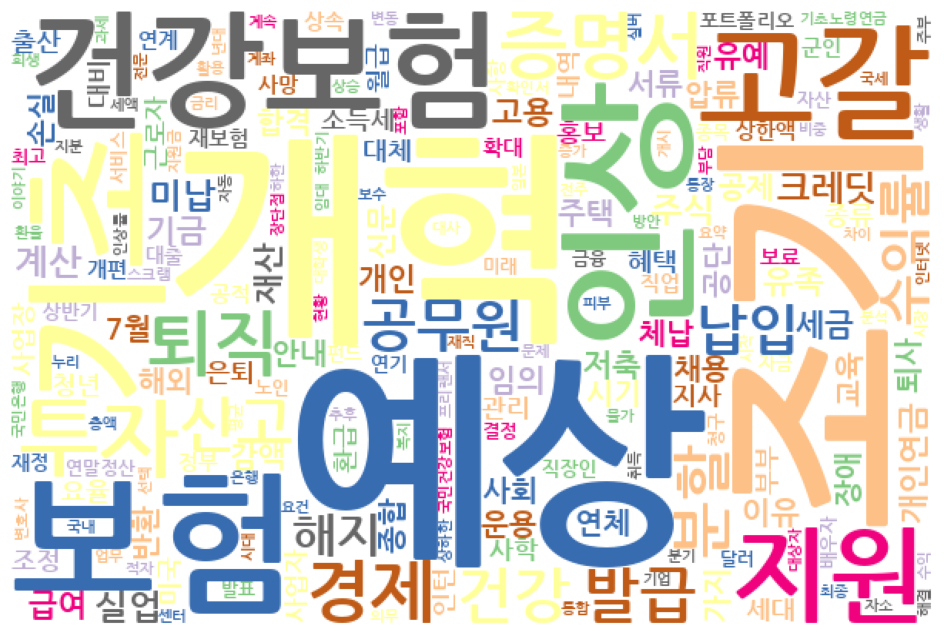

In [ ]:
# 글씨체 위치 지정
file_path='./'
wordcloud = WordCloud(font_path ='../data/NanumGothicBold.ttf', background_color = 'white', colormap = "Accent", width = 600, height = 400).generate_from_frequencies(top)
plt.figure(figsize=(12,8))   # 보여지는 크기 지정
plt.imshow(wordcloud) # 이미지 표시
plt.axis('off') #눈금 제거
plt.show()

### 댓글 데이터 마이닝

In [52]:
import itertools # 문서의 명사 리스트 확보
noun = list(itertools.chain(*data['comment_token_noun'])) # 리스트 접합
noun

['전환',
 '상당',
 '단디',
 '와이프',
 '명의',
 '사업자',
 '비용',
 '초기',
 '연기',
 '라고',
 '사업자',
 '스텔라',
 '실제',
 '상황',
 '고려',
 '분석',
 '소개',
 '정성',
 '스팅',
 '소통',
 '사업자',
 '결정',
 '고민',
 '균형',
 '온라인',
 '투자',
 '계발',
 '추구',
 '발전',
 '도움',
 '이웃',
 '공부',
 '엄마',
 '스텔라',
 '사업자',
 '피부',
 '박탈',
 '등의',
 '부분',
 '부분',
 '개인',
 '사업자',
 '지자',
 '시작',
 '미래',
 '얘기',
 '친정엄마',
 '사례',
 '체감',
 '퇴사',
 '당시',
 '퇴직금',
 '투자',
 '개인',
 '사업자',
 '실업',
 '급여',
 '충격',
 '보료',
 '충격',
 '경제',
 '공부',
 '시절',
 '부분',
 '엄마',
 '스텔라',
 '스팅',
 '도움',
 '힘찬',
 '하루',
 '사업자',
 '스텔라',
 '사업자',
 '미리',
 '염두',
 '가지',
 '박탈',
 '대박',
 '나시',
 '스텔라',
 '해외',
 '주식',
 '양도',
 '공제',
 '부양가족',
 '탈락',
 '공제',
 '공제',
 '라고',
 '트럭',
 '자영업자',
 '시작',
 '비중',
 '건강보험',
 '책정',
 '재산',
 '상관',
 '에소',
 '유하',
 '월세',
 '전세',
 '보유',
 '상관',
 '건강보험',
 '요건',
 '스팅',
 '본문',
 '보료',
 '산정',
 '재산',
 '삭감',
 '감액',
 '감액',
 '감액',
 '폐지',
 '얘기',
 '결정',
 '악법',
 '폐지',
 '탄핵',
 '원인',
 '수령자',
 '기초',
 '절반',
 '감액',
 '기초',
 '삭감',
 '박근혜',
 '목숨',
 '퇴진',
 '운동',
 '다집',
 '재산',
 '수입',
 '평생',
 '기초',
 '절반',
 '반면',
 '재산',

In [53]:
top = dict(count.most_common(500)) # 상위 500개 출력
top

{'예상': 1142,
 '개혁': 1129,
 '조기': 1095,
 '보험': 984,
 '기초': 924,
 '인상': 872,
 '건강보험': 735,
 '고갈': 696,
 '지원': 618,
 '투자': 606,
 '증명서': 547,
 '퇴직': 532,
 '경제': 502,
 '신고': 459,
 '발급': 450,
 '건강': 446,
 '분할': 442,
 '공무원': 441,
 '납입': 427,
 '수익률': 410,
 '해지': 403,
 '크레딧': 395,
 '계산': 392,
 '미납': 389,
 '실업': 385,
 '주식': 360,
 '재산': 339,
 '유족': 335,
 '개인연금': 329,
 '고용': 329,
 '기금': 329,
 '이유': 304,
 '임의': 301,
 '저축': 299,
 '개인': 296,
 '세금': 294,
 '급여': 291,
 '채용': 268,
 '공제': 265,
 '운용': 260,
 '7월': 257,
 '체납': 246,
 '유예': 245,
 '사회': 237,
 '감액': 231,
 '합격': 227,
 '주택': 226,
 '서류': 222,
 '안내': 222,
 '퇴사': 220,
 '시기': 218,
 '연체': 215,
 '가지': 211,
 '해외': 211,
 '압류': 210,
 '반환': 210,
 '공단': 207,
 '손실': 203,
 '장애': 197,
 '신문': 196,
 '교육': 191,
 '종합': 189,
 '소득세': 184,
 '종류': 183,
 '은퇴': 183,
 '사업장': 183,
 '대체': 182,
 '사업자': 180,
 '세대': 180,
 '관리': 180,
 '혜택': 179,
 '사학': 179,
 '지사': 177,
 '미국': 174,
 '환급': 174,
 '부부': 173,
 '인턴': 172,
 '홍보': 171,
 '근로자': 170,
 '조정': 169,
 '요율': 162,
 '대비': 160,
 

In [ ]:
# csv 파일로 저장
import csv

with open("../data/analysis_data/blog/댓글 top500.csv", 'w', newline = '') as file:
    writer = csv.writer(file)
    for k, v in top.items():
        writer.writerow([k, v])

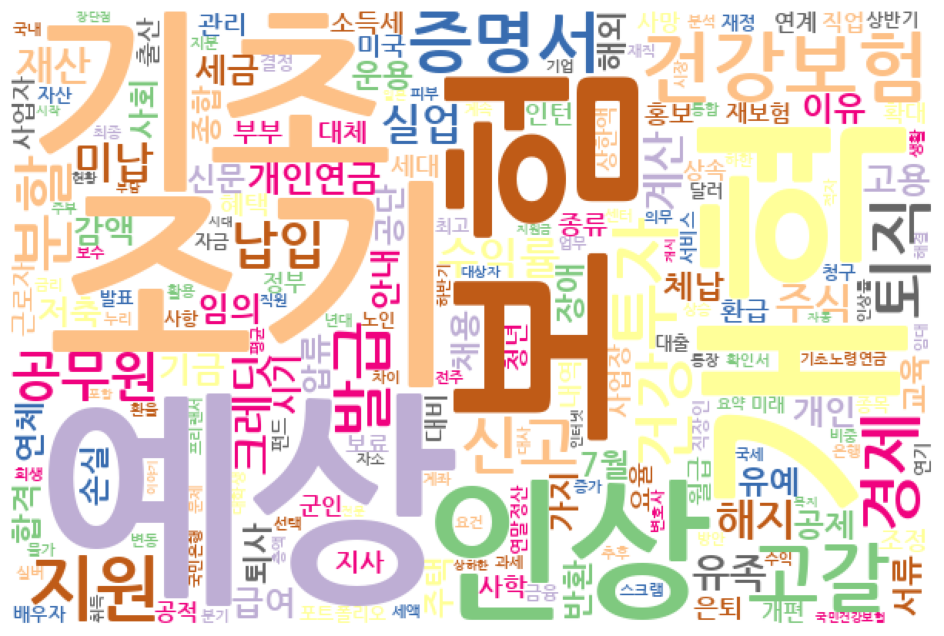

In [ ]:
# 글씨체 위치 지정
file_path='./'
wordcloud = WordCloud(font_path ='../data/NanumGothicBold.ttf', background_color = 'white', colormap = "Accent", width = 600, height = 400).generate_from_frequencies(top)
plt.figure(figsize=(12,8))   # 보여지는 크기 지정
plt.imshow(wordcloud) # 이미지 표시
plt.axis('off') #눈금 제거
plt.show()

### 전체 데이터 마이닝

In [56]:
import itertools # 문서의 명사 리스트 확보
noun = list(itertools.chain(*data['title_token_noun'])) # 리스트 접합
noun += list(itertools.chain(*data['doc_token_noun']))
noun += list(itertools.chain(*data['comment_token_noun']))
noun

['국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '고민',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '해결',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '세금',
 '문제',
 '해결',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '개인',
 '회생',
 '세금',
 '면책',
 '개인',
 '사업자',
 '사업자',
 '건강',
 '주부',
 '프리랜서',
 '변신',
 '감액',
 '해결',
 '재개',
 '정부',
 '지원',
 '연간',
 '시뮬레이션',
 '개인연금',
 '조기',
 '예상',
 '유예',
 '주의',
 '사항',
 '반환',
 '전략',
 '개인연금',
 '활용',
 '유족',
 '가지',
 '예상',
 '계산',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '세금',
 '연체',
 '해결',
 '예상',
 '주부',
 '조기',
 '장단점',
 '예상',
 '기초',
 '조기',
 '기초',
 '인상',
 '감액',
 '계산',
 '고갈',
 '인공지능',
 '대답',
 '인상률',
 '물가',
 '상승',
 '정정',
 '조기',
 '조기',
 '서류',
 '예상',
 '연기',
 '조기',
 '베이스',
 '투자',
 '수익률',
 '지급액',
 '대체',
 '10년',
 '10억',
 '도전',
 '개인연금',
 '퇴직',
 '부부',
 '유족',
 '실버',
 '대출',
 '금리',
 '조기',
 '감액',
 '이득',
 '예상',
 '재무',
 '설계',
 '단추',
 '예상',
 '예상',
 '정책',
 '방향',
 '2024년',
 '연기',
 '조기',
 '청년',
 '청년',
 '재단',
 '토의',
 '참여',
 '청년',
 '김준호',
 '단계',
 '이유',
 '평균',
 '프리랜서',
 '부담',
 '활용',
 '지원',
 '지급액',
 '소개'

In [57]:
from collections import Counter
count = Counter(noun) # 각 문자가 몇 번 나타나는지 알려주는 객체 반환

In [58]:
top = dict(count.most_common(500)) # 상위 100개 출력
top

{'투자': 22430,
 '지원': 19645,
 '보험': 19559,
 '기초': 19375,
 '개혁': 18694,
 '예상': 18430,
 '조기': 17272,
 '급여': 16850,
 '기금': 16544,
 '퇴직': 16058,
 '개인': 14702,
 '인상': 14494,
 '해당': 14049,
 '신고': 13871,
 '계산': 13360,
 '운용': 13211,
 '근로자': 12994,
 '납입': 12843,
 '정부': 12830,
 '사회': 12705,
 '상황': 12525,
 '은퇴': 12130,
 '공제': 12086,
 '주식': 11945,
 '재산': 11821,
 '부담': 11768,
 '사업장': 11661,
 '분할': 11596,
 '유족': 11437,
 '문제': 11319,
 '고갈': 11270,
 '경제': 11193,
 '스팅': 11090,
 '수익률': 11035,
 '생활': 10700,
 '선택': 10489,
 '세금': 10146,
 '국가': 10115,
 '건강': 9951,
 '공단': 9868,
 '재정': 9781,
 '증명서': 9354,
 '공무원': 9321,
 '자산': 9228,
 '회사': 9151,
 '장애': 9096,
 '서비스': 9056,
 '배우자': 8953,
 '평균': 8904,
 '발급': 8780,
 '금융': 8704,
 '대체': 8633,
 '저축': 8604,
 '가지': 8550,
 '상승': 8541,
 '대비': 8502,
 '건강보험': 8477,
 '결정': 8398,
 '시작': 8351,
 '세대': 8319,
 '서류': 8272,
 '안정': 8034,
 '혜택': 7997,
 '부분': 7914,
 '근로': 7842,
 '국내': 7791,
 '해외': 7738,
 '유지': 7526,
 '실업': 7521,
 '감액': 7457,
 '시기': 7388,
 '임의': 7380,
 '이유': 7311,
 '과세

In [ ]:
# csv 파일로 저장
import csv

with open("../data/analysis_data/blog/전체 데이터 top500.csv", 'w', newline = '') as file:
    writer = csv.writer(file)
    for k, v in top.items():
        writer.writerow([k, v])

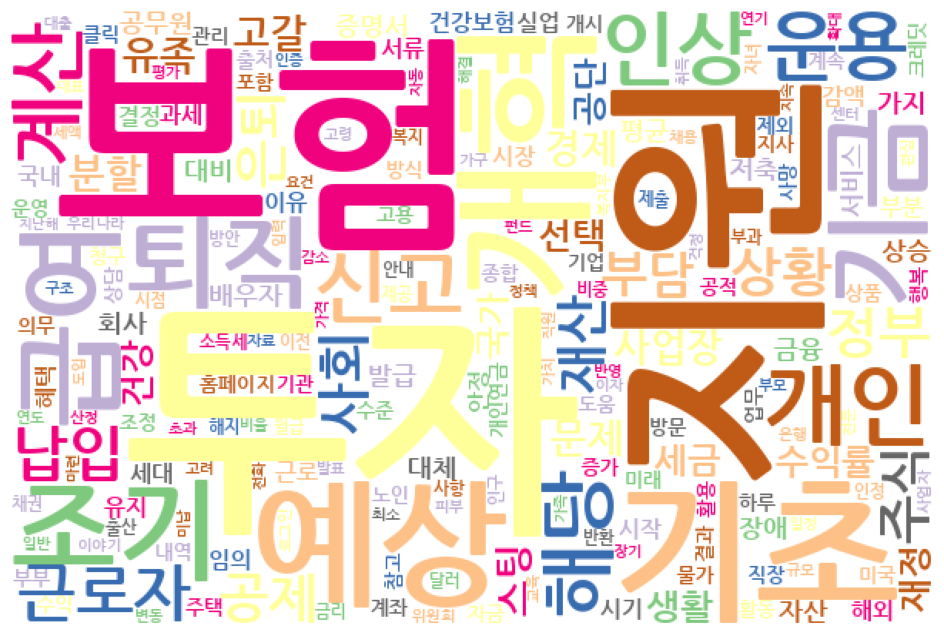

In [ ]:
# 글씨체 위치 지정
wordcloud = WordCloud(font_path ='../data/NanumGothicBold.ttf', background_color = 'white', colormap = "Accent", width = 600, height = 400).generate_from_frequencies(top)
plt.figure(figsize=(12,8))   # 보여지는 크기 지정
plt.imshow(wordcloud) # 이미지 표시
plt.axis('off') #눈금 제거
plt.show()

## K-Means Clustering

In [ ]:
import itertools # 반복 객체를 유용하게 다루는 라이브러리
import re  # 정규표현식을 사용할 수 있는 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer  # tf-idf값을 구하기 위해서 사용
from collections import defaultdict # 딕셔너리 기본값을 설정할 수 있는 라이브러리
from collections import Counter   # 단어들을 쉽게 집계하는 라이브러리
from wordcloud import WordCloud # Word Cloud 만들기
import matplotlib
import matplotlib.pyplot as plt   # 시각화하는 라이브러리

from IPython.display import set_matplotlib_formats #matplotlib의 plot 출력 형식 지정 Ex: set_matplotlib_formats('pdf', 'svg'), svg(Scalable Vector Graphics)
from gensim import corpora, models # 토픽 모델링을 위한 라이브러리
set_matplotlib_formats('retina')   # 고해상도 시각화
font_path = '../data/NanumGothicBold.ttf'  # 폰트 경로 지정
from sklearn.cluster import KMeans # KMeans 군집화 알고리즘을 사용하는 라이브러리
from tqdm import tqdm_notebook # progress bar
from tqdm import tqdm # 진행률 피드백 라이브러리
from tqdm import trange, notebook
from matplotlib import rc, font_manager
import seaborn as sns
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
from sklearn.cluster import KMeans
# 경고 메시지를 무시하고 숨기거나
warnings.filterwarnings(action='ignore')

/tmp/ipykernel_35080/1114977974.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')   # 고해상도 시각화


In [ ]:
#불용어 처리가 된 데이터 불러오기
df= pd.read_pickle("../data/analysis_data/blog/blog_total_doc.pkl")

### 본문 k-means clustering

In [63]:
doc_noun = []
for i in notebook.tqdm(range(0,len(df['doc_token_noun']))):
    # data['doc_token_noun'][i]에서 추출한 명사를 하나의 문자열로 연결 후 doc_noun 리스트에 추가
    doc_noun.append(' '.join(df['doc_token_noun'][i]))  # 각 문서의 명사들을 str으로 연결     
    #['문서1 명사', '문서2 명사', '...']

  0%|          | 0/21557 [00:00<?, ?it/s]

In [64]:
# 텍스트 문서 모음을 단어 tf-idf 행렬로 변환 
vec = TfidfVectorizer(min_df = 0.01, max_df=0.95) # 문서의 1%~95%로 나타나는 단어만 고려.  #min_df: 특정 단어가 나타나는 '문서의 수의 최소 빈도값을 설정/소수형태면 %로 설정
X = vec.fit_transform(doc_noun) # 설정한 Vectorizer로 벡터화

In [65]:
print(vec.get_feature_names_out()) # tf-idf 행렬 추출

['10' '100' '10년' ... '흐름' '흑자' '희망']


In [66]:
print(X)  # (문서인덱스, 등장단어인덱스) tf-idf값

  (0, 513)	0.028690594491008383
  (0, 1393)	0.021210731250072157
  (0, 1594)	0.0255201370013846
  (0, 633)	0.08362356722588987
  (0, 528)	0.03191869210847834
  (0, 115)	0.021587847300240357
  (0, 785)	0.038179894476040414
  (0, 454)	0.08559990614302215
  (0, 678)	0.07358936369342861
  (0, 298)	0.03151755148729439
  (0, 1015)	0.03545736258252313
  (0, 1225)	0.027374970645086837
  (0, 1608)	0.03458246734451397
  (0, 1119)	0.04021100327429062
  (0, 211)	0.018851893074940937
  (0, 1521)	0.03767977164225638
  (0, 467)	0.043411520841688644
  (0, 991)	0.03203603813728612
  (0, 403)	0.03149544575963431
  (0, 824)	0.0397564478212043
  (0, 1276)	0.04637909699178309
  (0, 507)	0.023266716703899546
  (0, 509)	0.0412074235762257
  (0, 1208)	0.03020237734029532
  (0, 367)	0.05909949748653095
  :	:
  (21555, 689)	0.16730430416934008
  (21555, 1262)	0.06862057891490587
  (21555, 826)	0.04337129806550986
  (21555, 1053)	0.09269450877241989
  (21555, 1175)	0.14097094233671856
  (21555, 1283)	0.116832891

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


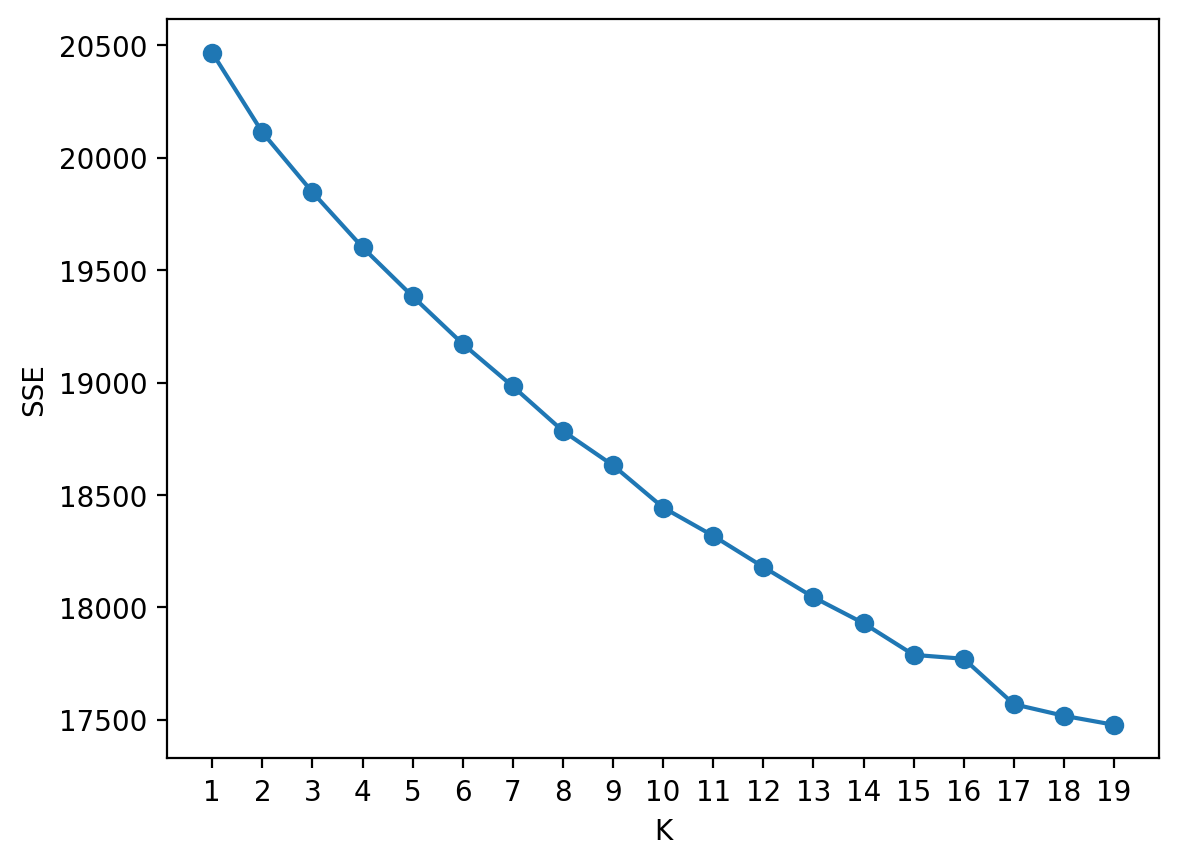

In [67]:
# 군집수가 1~9개일때로 elbow 그래프 시각화
def elbow(X):
    sse = []  # sse 값을 저장할 리스트

    for i in range(1,20):  
        km = KMeans(n_clusters=i, algorithm='auto', random_state=5)  #k-means algorithm: auto(기본값) )
        km.fit(X) # k-means 군집화 수행
        sse.append(km.inertia_)  # sse 값을 리스트에 추가
        print(i) # 현재 i 출력(진행 상황 확인용)

    # Elbow 그래프 시각화    
    plt.plot(range(1,20), sse, marker='o')
    plt.xlabel('K') # K 값 (클러스터 수)
    plt.ylabel('SSE') # see 값
    plt.xticks(range(1,20))
    plt.show()

elbow(X)

In [68]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=14, algorithm='auto', random_state=5) # K-means 모델 생성, 클러스터 수를 4로 설정
model.fit(X)  # K-means 군집화 수행

KMeans(algorithm='auto', n_clusters=14, random_state=5)

In [69]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]   # 군집 중심의 단어들을 내림차순으로 정렬하여 인덱스 반환
terms = vec.get_feature_names_out()  # mac :terms = vec.get_feature_names()
for i in range(14): # 14개의 클러스터에 대해 반복
    print("Cluster %d:" % (i)) # 현재 클러스터 번호 출력
    for ind in order_centroids[i, :500]:   # [행, 열]     # [클러스터 인덱스, 클러스터 내 인덱스] 
        print(' %s' % terms[ind])   # ind: 가져온 단어 인덱스    #terms[ind]: 해당 인덱스를 가진 단어
    print('\n')

Top terms per cluster:
Cluster 0:
 발급
 증명서
 재직
 내역
 클릭
 증명
 민원
 확인서
 선택
 서류
 로그인
 서비스
 인증
 사업장
 출력
 프린터
 회사
 제출
 개인
 팩스
 홈페이지
 기관
 메뉴
 용도
 인터넷
 화면
 전송
 동의
 요청
 버튼
 보험
 양식
 공단
 증서
 번호
 문서
 건강보험
 접속
 모바일
 이직
 안내
 검색
 개인정보
 체크
 수집
 상단
 방문
 근무
 통계
 인쇄
 해당
 이력
 입력
 업무
 온라인
 완료
 특정
 소식
 대체
 센터
 직장
 사업자
 신고
 프리랜서
 공공
 공동
 금융
 가지
 요구
 지원
 사항
 정부
 퇴사
 건강
 편리
 페이
 공인인증서
 자동
 부분
 지사
 근로자
 대출
 관리
 전화
 참고
 은행
 24
 항목
 증빙
 표시
 공제
 관계
 납입
 완납
 기재
 도움
 활용
 발송
 자료
 영수증
 주민등록
 사회
 스팅
 연락
 비대
 첨부
 페이지
 카카오
 등본
 고용
 속도
 주민등록번호
 설치
 이전
 소개
 결정
 주민
 예상
 산정
 필수
 청구
 징수
 명칭
 과정
 메인
 하단
 채용
 제공
 이동
 급여
 절차
 출처
 직원
 신청서
 가족
 취업
 우측
 신분증
 퇴직
 부서
 상황
 의무
 무료
 종류
 원천
 인사
 상실
 중앙
 가능
 취득
 연말정산
 메일
 일반
 이름
 기업
 서식
 행정
 방식
 운영
 된다
 하면
 생년월일
 근로
 오른쪽
 상담
 고객
 활동
 전환
 실시간
 해지
 회생
 주소
 부과
 고유
 목적
 환영
 유지
 포함
 재보험
 환급
 계속
 세금
 카카오톡
 국민건강보험
 주택
 기금
 성명
 화질
 직장인
 대부분
 경색
 센스
 장애인
 라이
 수수료
 이유
 대신
 왼쪽
 과거
 입사
 결과
 전국
 법인
 일자
 국세
 장애
 포털
 목록
 종이
 형태
 인원
 불편
 기능
 보기
 단계
 국세청
 소속
 인적
 연결
 순서
 수단
 담당
 대표자
 휴대폰
 생활
 구분
 대표
 경영
 

## LDA-3

In [1]:
import pandas as pd
import numpy as np
import itertools # 반복 객체를 유용하게 다루는 라이브러리
import re  # 정규표현식을 사용할 수 있는 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer  # tf-idf값을 구하기 위해서 사용
from collections import defaultdict
from collections import Counter   # 단어들을 쉽게 집계하는 라이브러리
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt   # 시각화하는 라이브러리
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')   # 선명하게 시각화
from sklearn.cluster import KMeans
from tqdm import trange, notebook
from matplotlib import rc, font_manager
import seaborn as sns
import gensim
from gensim.models import CoherenceModel

/tmp/ipykernel_35080/232805538.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')   # 선명하게 시각화


In [ ]:
#불용어 처리가 된 데이터 불러오기
df= pd.read_pickle("../data/analysis_data/blog/blog_total_doc.pkl")

In [3]:
# 명사만 추출한 리스트를 바탕으로 단어 빈도별 목록을 생성.
from gensim import corpora, models
noun_dic=corpora.Dictionary(df['doc_token_noun'])  # 딕셔너리 클래스로 사전생성, 각 단어별 id도 함께 생성
noun_dic.token2id                                # 각 단어 별 생성된 id 확인     

{'5년': 0,
 '90': 1,
 '가계': 2,
 '가계부채': 3,
 '가산세': 4,
 '개인': 5,
 '거부': 6,
 '거주': 7,
 '건강': 8,
 '결과': 9,
 '경기': 10,
 '경제': 11,
 '고민': 12,
 '고지': 13,
 '고통': 14,
 '공간': 15,
 '관심': 16,
 '구조조정': 17,
 '국가': 18,
 '국내': 19,
 '국세': 20,
 '국세청': 21,
 '그 후': 22,
 '기업': 23,
 '나머지': 24,
 '납세': 25,
 '다다': 26,
 '다라': 27,
 '다툼': 28,
 '대금': 29,
 '대부': 30,
 '대신': 31,
 '대출': 32,
 '대출금': 33,
 '대한민국': 34,
 '도움': 35,
 '동의': 36,
 '등에': 37,
 '면책': 38,
 '모색': 39,
 '무리': 40,
 '무시': 41,
 '문제': 42,
 '미납': 43,
 '방식': 44,
 '방어': 45,
 '방향': 46,
 '벌금': 47,
 '법률': 48,
 '법리': 49,
 '변제': 50,
 '병원': 51,
 '불황': 52,
 '비상': 53,
 '사무실': 54,
 '사업체': 55,
 '상가': 56,
 '상담': 57,
 '상대': 58,
 '상품': 59,
 '상환': 60,
 '상황': 61,
 '성실': 62,
 '세금': 63,
 '세납': 64,
 '소멸': 65,
 '소멸시효': 66,
 '소유': 67,
 '순간': 68,
 '신용카드': 69,
 '실직': 70,
 '악순환': 71,
 '압류': 72,
 '압박': 73,
 '양도소득세': 74,
 '어려움': 75,
 '언급': 76,
 '업체': 77,
 '연체': 78,
 '오피스텔': 79,
 '완료': 80,
 '외면': 81,
 '운영': 82,
 '원금': 83,
 '위기': 84,
 '유예': 85,
 '유일한': 86,
 '은행': 87,
 '의무': 88,
 '의문':

In [4]:
corpus = [noun_dic.doc2bow(text) for text in df['doc_token_noun']]
# 문서별 문서 안의 단어의 id와 빈도수로 수치화

In [5]:
import gensim
from gensim.models import CoherenceModel

Lda = gensim.models.ldamodel.LdaModel 
perplexity_score = []  # perplexity_score를 저장할 리스트
coherence_score = []   # coherence_score를 저장할 리스트

for i in notebook.tqdm(range(1,15)): 
    ldamodel = Lda(corpus, num_topics = i, id2word = noun_dic, passes = 15, random_state = 0) 
    perplexity_score.append(ldamodel.log_perplexity(corpus)) 
    coherence_score.append(CoherenceModel(model = ldamodel, texts = df['doc_token_noun'],
                                         dictionary = noun_dic, coherence = 'c_v').get_coherence())
    print(i,'process complete')

  0%|          | 0/14 [00:00<?, ?it/s]

1 process complete
2 process complete
3 process complete
4 process complete
5 process complete
6 process complete
7 process complete
8 process complete
9 process complete
10 process complete
11 process complete
12 process complete
13 process complete
14 process complete


### 토픽 개수 결정

#### 토픽 수에 따른 혼잡성 점수 그래프 확인

혼잡성
- 확률 모델이 결과를 얼마나 정확하게
예측하는지 판단
- 낮을수록 정확하게 예측
- 하지만 낮다고 해서, 
결과가 해석에 용이하다는 의미는 아님

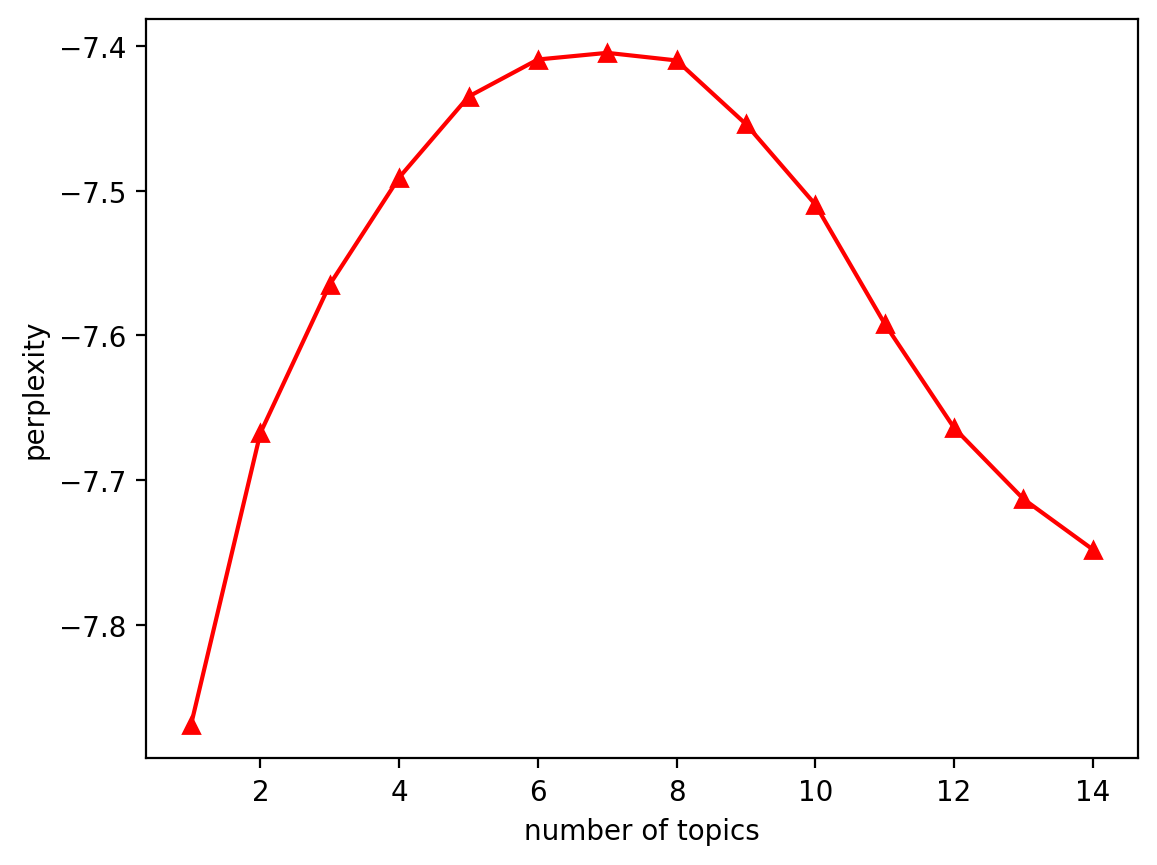

In [6]:
plt.plot(range(1,15), perplexity_score, 'r', marker ='^') #(x,y,color)
plt.xlabel("number of topics")
plt.ylabel("perplexity") # 혼잡도
plt.show()

#### 토픽 수에 따른 일관성 점수 그래프 확인

일관성
- 토픽이 얼마나 의미론적으로 일관성
있는지 판단
- 높을수록 의미론적 일관성 높음

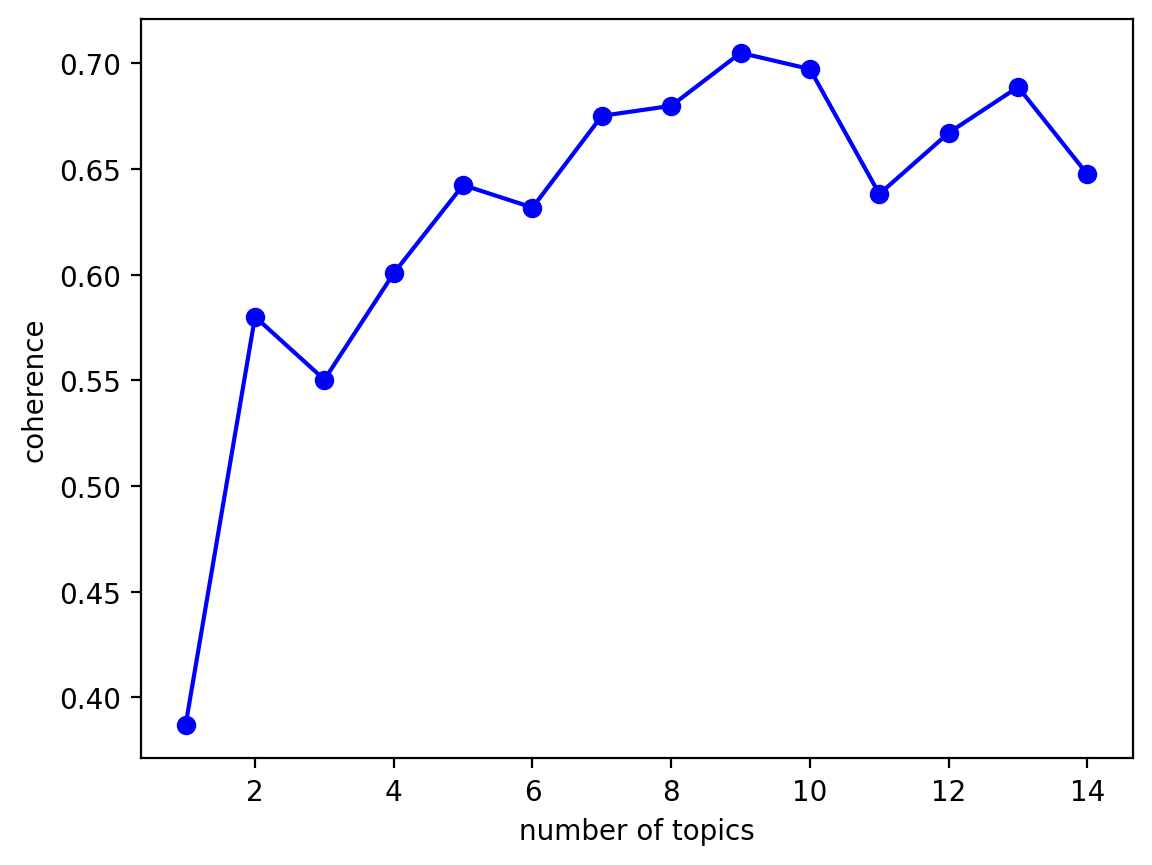

In [7]:
plt.plot(range(1,15), coherence_score, 'b', marker ='o') # 파란색, o 모양
plt.xlabel("number of topics")
plt.ylabel("coherence") # 일관성
plt.show()

## topic 갯수는 6개로 진행

In [8]:
import itertools # 반복 객체를 유용하게 다루는 라이브러리
import re  # 정규표현식을 사용할 수 있는 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer  # tf-idf값을 구하기 위해서 사용
from collections import defaultdict
from collections import Counter   # 단어들을 쉽게 집계하는 라이브러리
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt   # 시각화하는 라이브러리
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')   # 선명하게 시각화
from sklearn.cluster import KMeans
from tqdm import trange, notebook
from matplotlib import rc, font_manager
import seaborn as sns

/tmp/ipykernel_35080/4236327776.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')   # 선명하게 시각화


### LDA 토픽 모델링 진행

In [9]:
noun_lda = Lda(corpus, num_topics = 6, id2word = noun_dic, passes = 15, random_state = 0)
topics = noun_lda.print_topics(num_words = 5) 
for topic in notebook.tqdm(topics): 
    print(topic)

  0%|          | 0/6 [00:00<?, ?it/s]

(0, '0.028*"기초" + 0.024*"조기" + 0.020*"유족" + 0.017*"장애" + 0.012*"감액"')
(1, '0.027*"투자" + 0.015*"주식" + 0.014*"운용" + 0.013*"수익률" + 0.011*"기금"')
(2, '0.020*"개혁" + 0.014*"인상" + 0.013*"고갈" + 0.012*"재정" + 0.011*"기금"')
(3, '0.008*"교육" + 0.008*"채용" + 0.007*"지원" + 0.005*"공단" + 0.005*"경험"')
(4, '0.020*"신고" + 0.020*"보험" + 0.016*"근로자" + 0.016*"사업장" + 0.015*"지원"')
(5, '0.040*"분할" + 0.025*"재산" + 0.021*"크레딧" + 0.017*"실업" + 0.014*"배우자"')


In [10]:
noun_dtm = [noun_dic.doc2bow(text) for text in df['doc_token_noun']] # 문서별 문서 안의 단어의 id와 빈도수로 수치화
ldamodel=Lda(noun_dtm, num_topics=6, id2word=noun_dic, passes=10,random_state=0)

topics = [] # 예측된 토픽들을 저장할 리스트
for i in trange(len(noun_dtm)):  # 각 문서에 대해 반복
    prop_sort=[]  # 토픽별 확률을 저장할 리스트
    topic_sort=[] # 토픽 인덱스를 저장할 리스트
    for topic , prop in ldamodel.get_document_topics(noun_dtm)[i]:  #각 문서마다 토픽 별로 해당할 확률이 부여됨
        prop_sort.append(prop)  # 해당 토픽의 확률을 리스트에 추가
        topic_sort.append(topic)  # 해당 토픽의 인덱스를 리스트에 추가
    topics.append(topic_sort[prop_sort.index(max(prop_sort))])  #확률 중 가장 높은 확률의 토픽을 해당 문서의 토픽으로 지정

df['doc_topic'] = topics #모든 문서의 토픽을 데이터프레임에 추가

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21557/21557 [00:02<00:00, 7242.37it/s]


In [ ]:
df.to_pickle("../data/analysis_data/blog/pension_blog_topic_doc.pkl")

In [12]:
aa= df.copy()

In [13]:
aa['doc_topic'].value_counts()

doc_topic
2    5651
4    5160
0    3538
1    3241
3    2616
5    1351
Name: count, dtype: int64

In [14]:
topic0 = aa[aa['doc_topic'] == 0] 
topic1 = aa[aa['doc_topic'] == 1]  
topic2 = aa[aa['doc_topic'] == 2] 
topic3 = aa[aa['doc_topic'] == 3] 
topic4 = aa[aa['doc_topic'] == 4] 
topic5 = aa[aa['doc_topic'] == 5] 

In [15]:
topic0_tn = topic0['doc_token_noun']  # 토픽 번호가 0인 문서들의 토큰화된 명사들을 topic0_tn에 저장
topic1_tn = topic1['doc_token_noun']  # 토픽 번호가 1인 문서들의 토큰화된 명사들을 topic1_tn에 저장
topic2_tn = topic2['doc_token_noun']  # 토픽 번호가 2인 문서들의 토큰화된 명사들을 topic2_tn에 저장
topic3_tn = topic3['doc_token_noun']
topic4_tn = topic4['doc_token_noun']
topic5_tn = topic5['doc_token_noun']

In [16]:
import itertools
topic0_nlist = list(itertools.chain(*topic0_tn)) # 리스트 언패킹
topic1_nlist = list(itertools.chain(*topic1_tn)) # 리스트 언패킹
topic2_nlist = list(itertools.chain(*topic2_tn)) # 리스트 언패킹
topic3_nlist = list(itertools.chain(*topic3_tn)) # 리스트 언패킹
topic4_nlist = list(itertools.chain(*topic4_tn)) # 리스트 언패킹
topic5_nlist = list(itertools.chain(*topic5_tn)) # 리스트 언패킹

In [17]:
from collections import Counter # 단어들을 쉽게 집계하기 위해 사용

### 토픽 0

In [18]:
count = Counter(topic0_nlist) # Counter 객체를 사용하여 topic0_nlist 리스트의 요소들을 카운트
hund0 = dict(count.most_common(500)) # 상위 500개 단어 출력

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

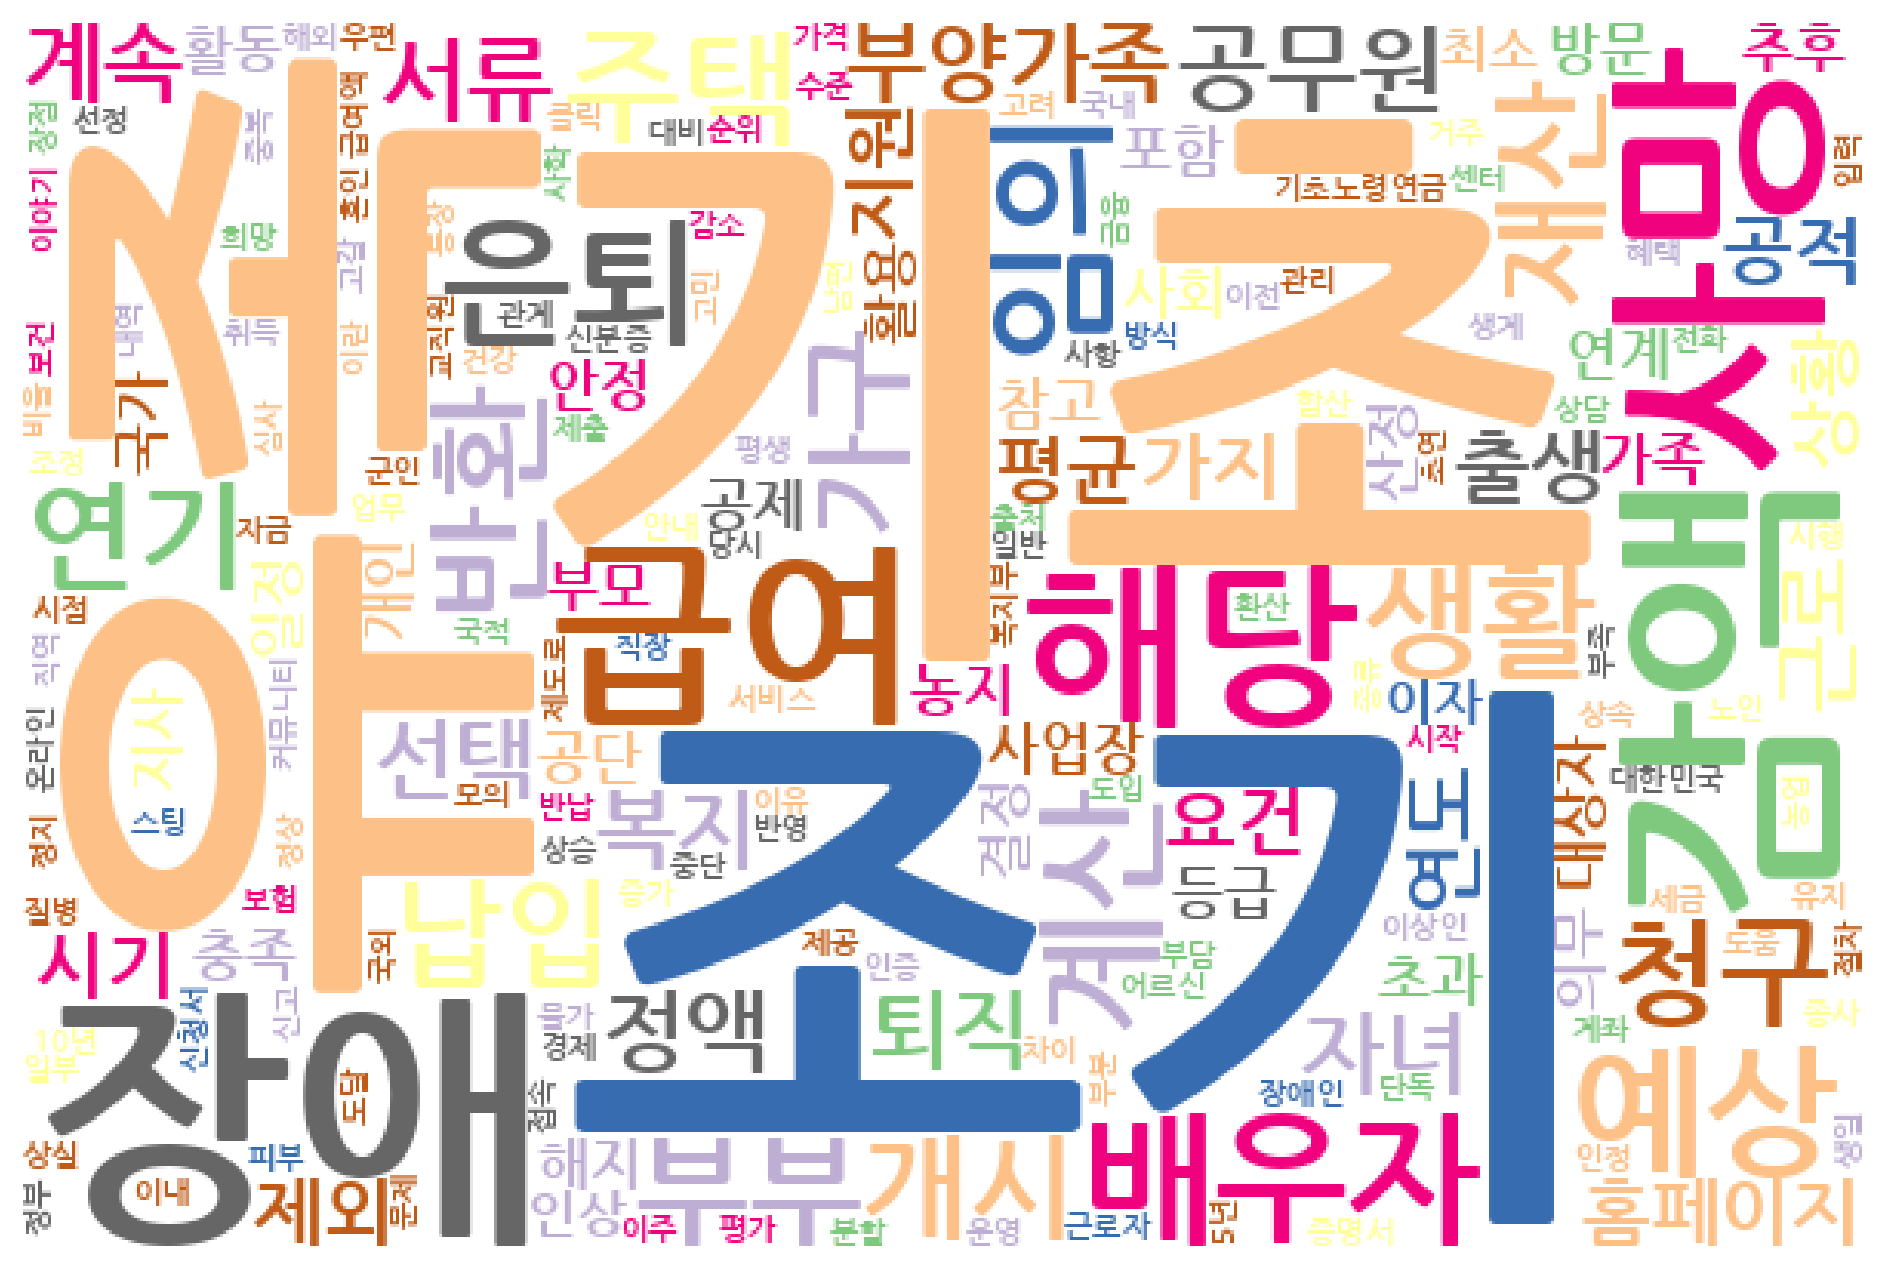

In [ ]:
%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund0)
# 워드클라우드 출력

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

In [21]:
hund0

{'기초': 10618,
 '조기': 9911,
 '유족': 8034,
 '장애': 6434,
 '감액': 5024,
 '사망': 4537,
 '급여': 4432,
 '해당': 4355,
 '배우자': 4248,
 '예상': 4213,
 '은퇴': 3961,
 '임의': 3816,
 '계산': 3673,
 '반환': 3363,
 '생활': 3242,
 '주택': 3229,
 '부부': 3137,
 '재산': 3075,
 '청구': 2960,
 '납입': 2923,
 '연기': 2908,
 '개시': 2697,
 '가구': 2617,
 '공무원': 2442,
 '서류': 2356,
 '정액': 2208,
 '자녀': 2200,
 '부양가족': 2140,
 '복지': 2125,
 '선택': 2120,
 '퇴직': 2086,
 '계속': 2082,
 '근로': 1976,
 '연도': 1884,
 '출생': 1876,
 '홈페이지': 1868,
 '시기': 1847,
 '요건': 1811,
 '가지': 1802,
 '평균': 1776,
 '제외': 1761,
 '공적': 1737,
 '지원': 1726,
 '상황': 1666,
 '사업장': 1661,
 '공제': 1657,
 '방문': 1652,
 '등급': 1652,
 '참고': 1649,
 '포함': 1645,
 '초과': 1620,
 '연계': 1601,
 '농지': 1601,
 '사회': 1598,
 '충족': 1569,
 '부모': 1545,
 '대상자': 1526,
 '해지': 1526,
 '안정': 1509,
 '개인': 1505,
 '활용': 1498,
 '공단': 1483,
 '지사': 1445,
 '일정': 1433,
 '가족': 1386,
 '추후': 1382,
 '의무': 1381,
 '결정': 1374,
 '국가': 1359,
 '산정': 1357,
 '활동': 1355,
 '이자': 1337,
 '인상': 1330,
 '최소': 1324,
 '기초노령연금': 1324,
 '종사': 1321,

### 토픽 1

<function matplotlib.pyplot.show(close=None, block=None)>

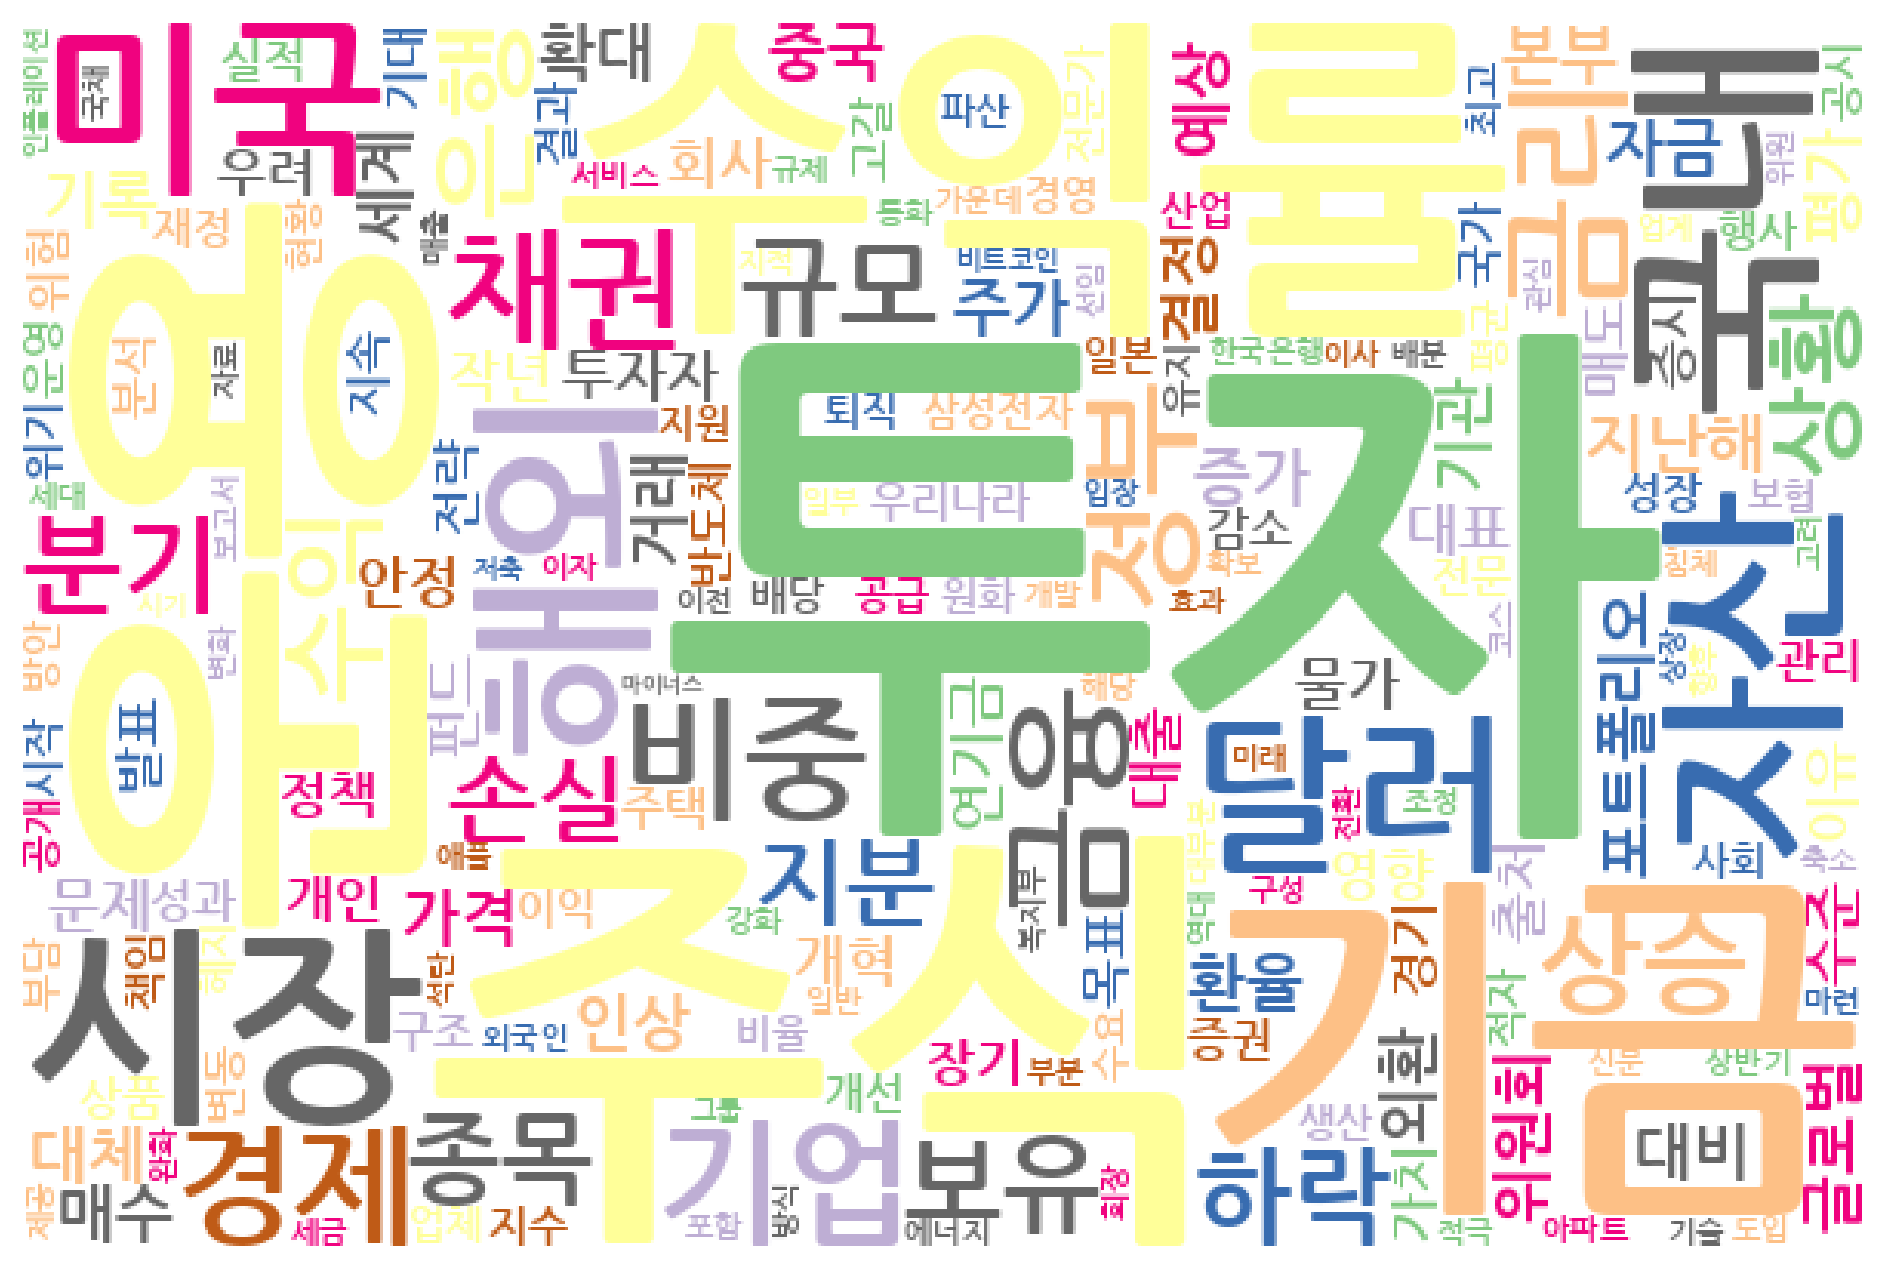

In [ ]:
count = Counter(topic1_nlist) # Counter 객체를 사용하여 topic0_nlist 리스트의 요소들을 카운트
hund1 = dict(count.most_common(500)) # 상위 500개 단어 출력

%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund1)
# 워드클라우드 출력

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

In [23]:
hund1

{'투자': 14584,
 '주식': 9019,
 '운용': 7537,
 '기금': 7441,
 '수익률': 6921,
 '시장': 5963,
 '국내': 5436,
 '해외': 5309,
 '자산': 5079,
 '미국': 4985,
 '달러': 4660,
 '기업': 4447,
 '비중': 3971,
 '경제': 3776,
 '채권': 3696,
 '금융': 3626,
 '금리': 3595,
 '정부': 3292,
 '상승': 2877,
 '보유': 2509,
 '규모': 2497,
 '은행': 2488,
 '수익': 2445,
 '하락': 2397,
 '분기': 2372,
 '종목': 2366,
 '상황': 2354,
 '지분': 2280,
 '손실': 2267,
 '지난해': 2252,
 '대체': 2136,
 '환율': 2131,
 '주가': 2100,
 '가격': 2011,
 '거래': 1989,
 '기록': 1942,
 '인상': 1904,
 '포트폴리오': 1901,
 '증가': 1825,
 '위원회': 1820,
 '자금': 1781,
 '확대': 1711,
 '매수': 1692,
 '대비': 1690,
 '중국': 1680,
 '본부': 1677,
 '평가': 1672,
 '기관': 1593,
 '세계': 1577,
 '결정': 1574,
 '글로벌': 1563,
 '외환': 1558,
 '예상': 1550,
 '투자자': 1542,
 '작년': 1534,
 '개혁': 1523,
 '연기금': 1521,
 '안정': 1496,
 '영향': 1488,
 '문제': 1485,
 '대표': 1446,
 '대출': 1423,
 '회사': 1402,
 '물가': 1400,
 '이유': 1396,
 '수준': 1365,
 '출처': 1353,
 '펀드': 1349,
 '우려': 1309,
 '증시': 1303,
 '개인': 1284,
 '장기': 1284,
 '정책': 1283,
 '발표': 1256,
 '전략': 1220,
 '경기': 1210,
 '

### 토픽 2

<function matplotlib.pyplot.show(close=None, block=None)>

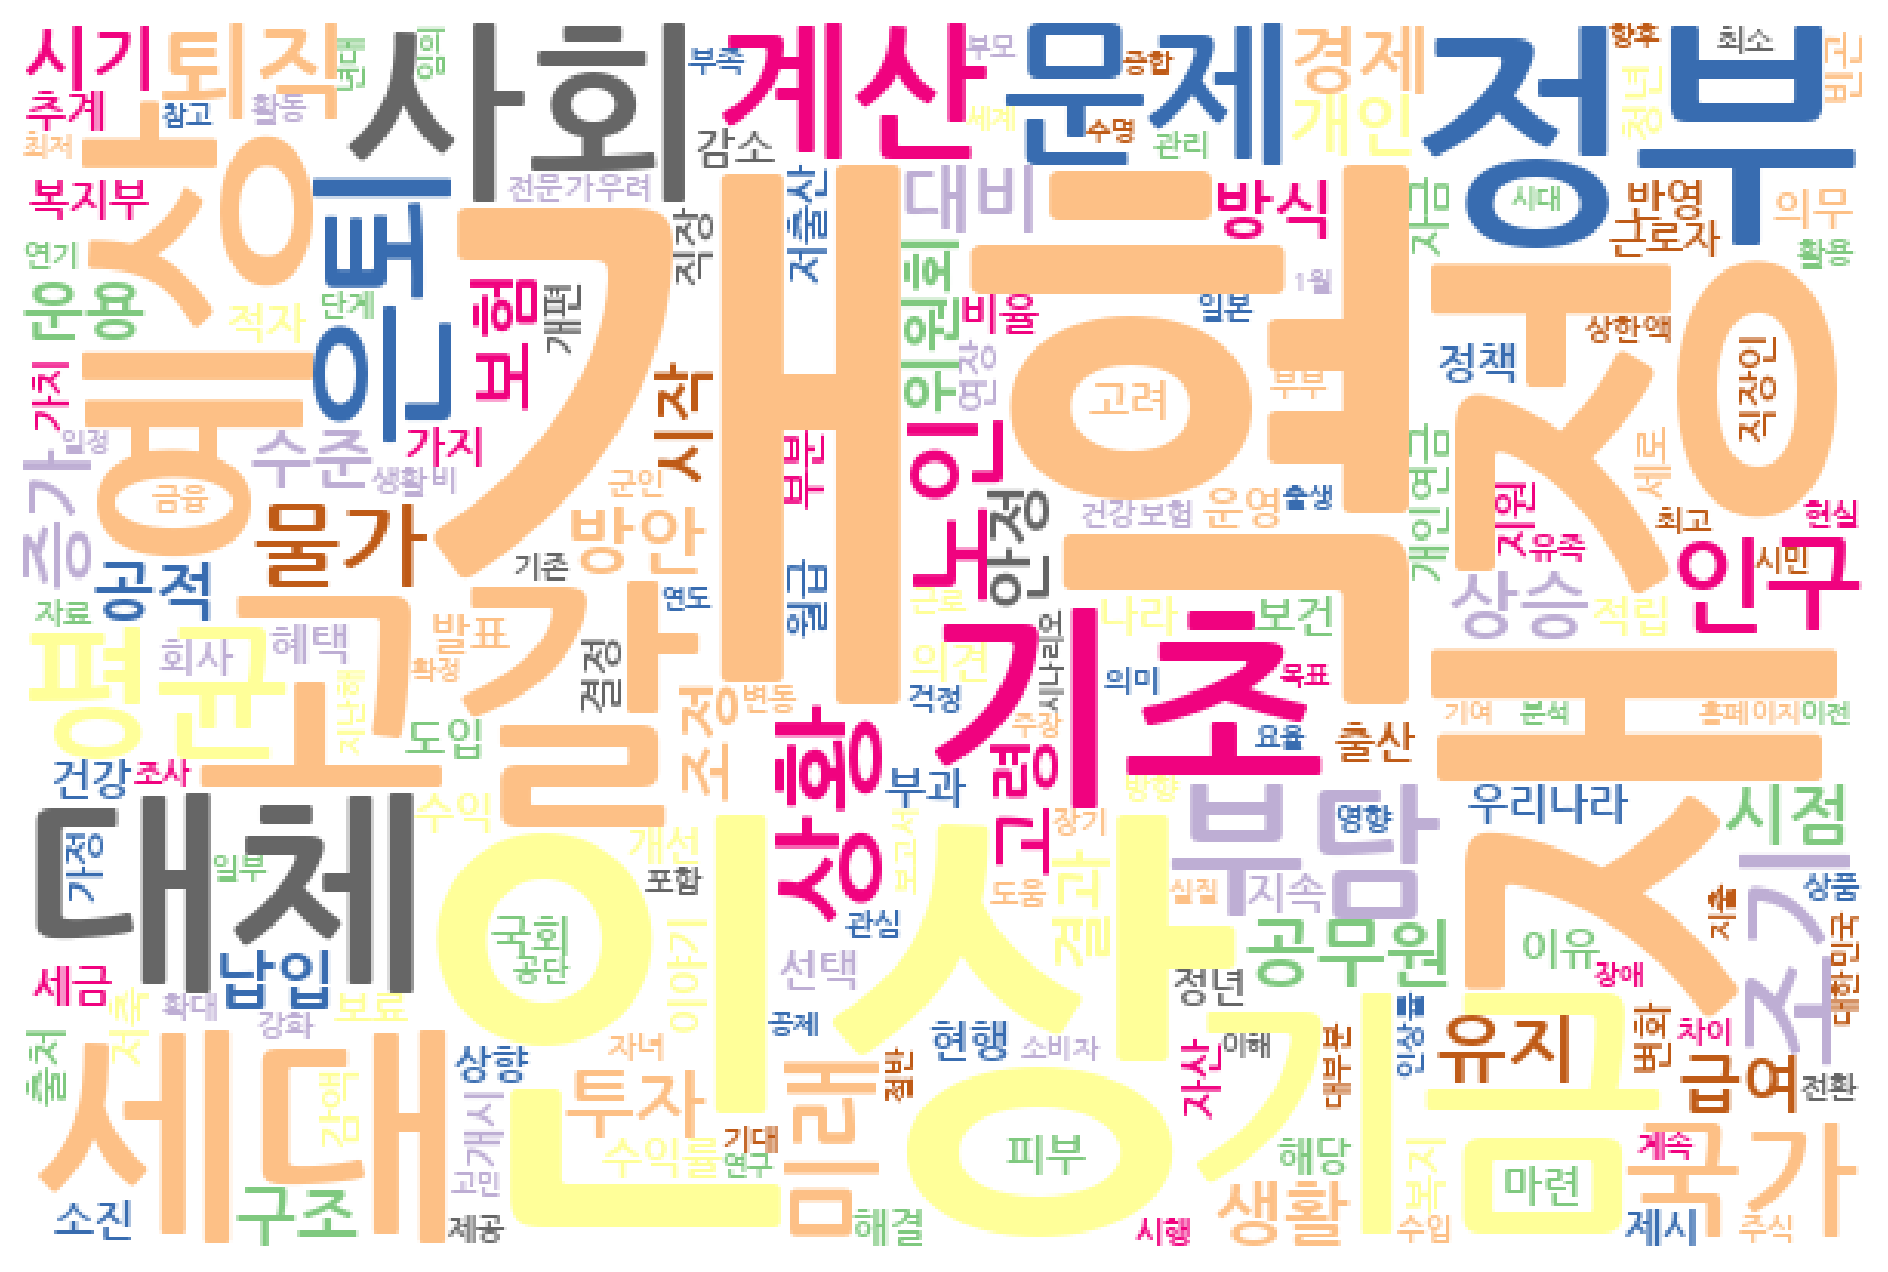

In [ ]:
count = Counter(topic2_nlist) # Counter 객체를 사용하여 topic0_nlist 리스트의 요소들을 카운트
hund2 = dict(count.most_common(500)) # 상위 500개 단어 출력

%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund2)
# 워드클라우드 출력

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

In [25]:
hund2

{'개혁': 14511,
 '인상': 8279,
 '재정': 7696,
 '고갈': 7643,
 '기금': 7108,
 '예상': 6616,
 '정부': 6399,
 '세대': 5816,
 '기초': 5313,
 '대체': 5287,
 '사회': 5268,
 '문제': 4932,
 '은퇴': 4663,
 '계산': 4490,
 '부담': 4438,
 '평균': 4333,
 '국가': 4218,
 '조기': 4098,
 '상황': 3977,
 '인구': 3839,
 '퇴직': 3839,
 '노인': 3798,
 '미래': 3754,
 '물가': 3720,
 '공무원': 3557,
 '경제': 3510,
 '투자': 3457,
 '상승': 3370,
 '유지': 3286,
 '보험': 3259,
 '방안': 3246,
 '대비': 3229,
 '고령': 3188,
 '증가': 3176,
 '생활': 3105,
 '시기': 3051,
 '시점': 3023,
 '개인': 3015,
 '안정': 3000,
 '납입': 2844,
 '수준': 2825,
 '방식': 2824,
 '공적': 2737,
 '급여': 2701,
 '구조': 2620,
 '위원회': 2596,
 '운용': 2566,
 '결과': 2531,
 '조정': 2520,
 '시작': 2436,
 '우리나라': 2434,
 '가지': 2424,
 '개시': 2389,
 '수익률': 2353,
 '국회': 2353,
 '이유': 2333,
 '운영': 2245,
 '세금': 2238,
 '출산': 2212,
 '건강': 2208,
 '지원': 2201,
 '반영': 2194,
 '출처': 2133,
 '발표': 2116,
 '정책': 2087,
 '개인연금': 2056,
 '피부': 2038,
 '복지부': 1999,
 '월급': 1977,
 '선택': 1959,
 '혜택': 1884,
 '적자': 1873,
 '의견': 1847,
 '소진': 1836,
 '의무': 1834,
 '추계': 1824,
 '이

### 토픽 3

<function matplotlib.pyplot.show(close=None, block=None)>

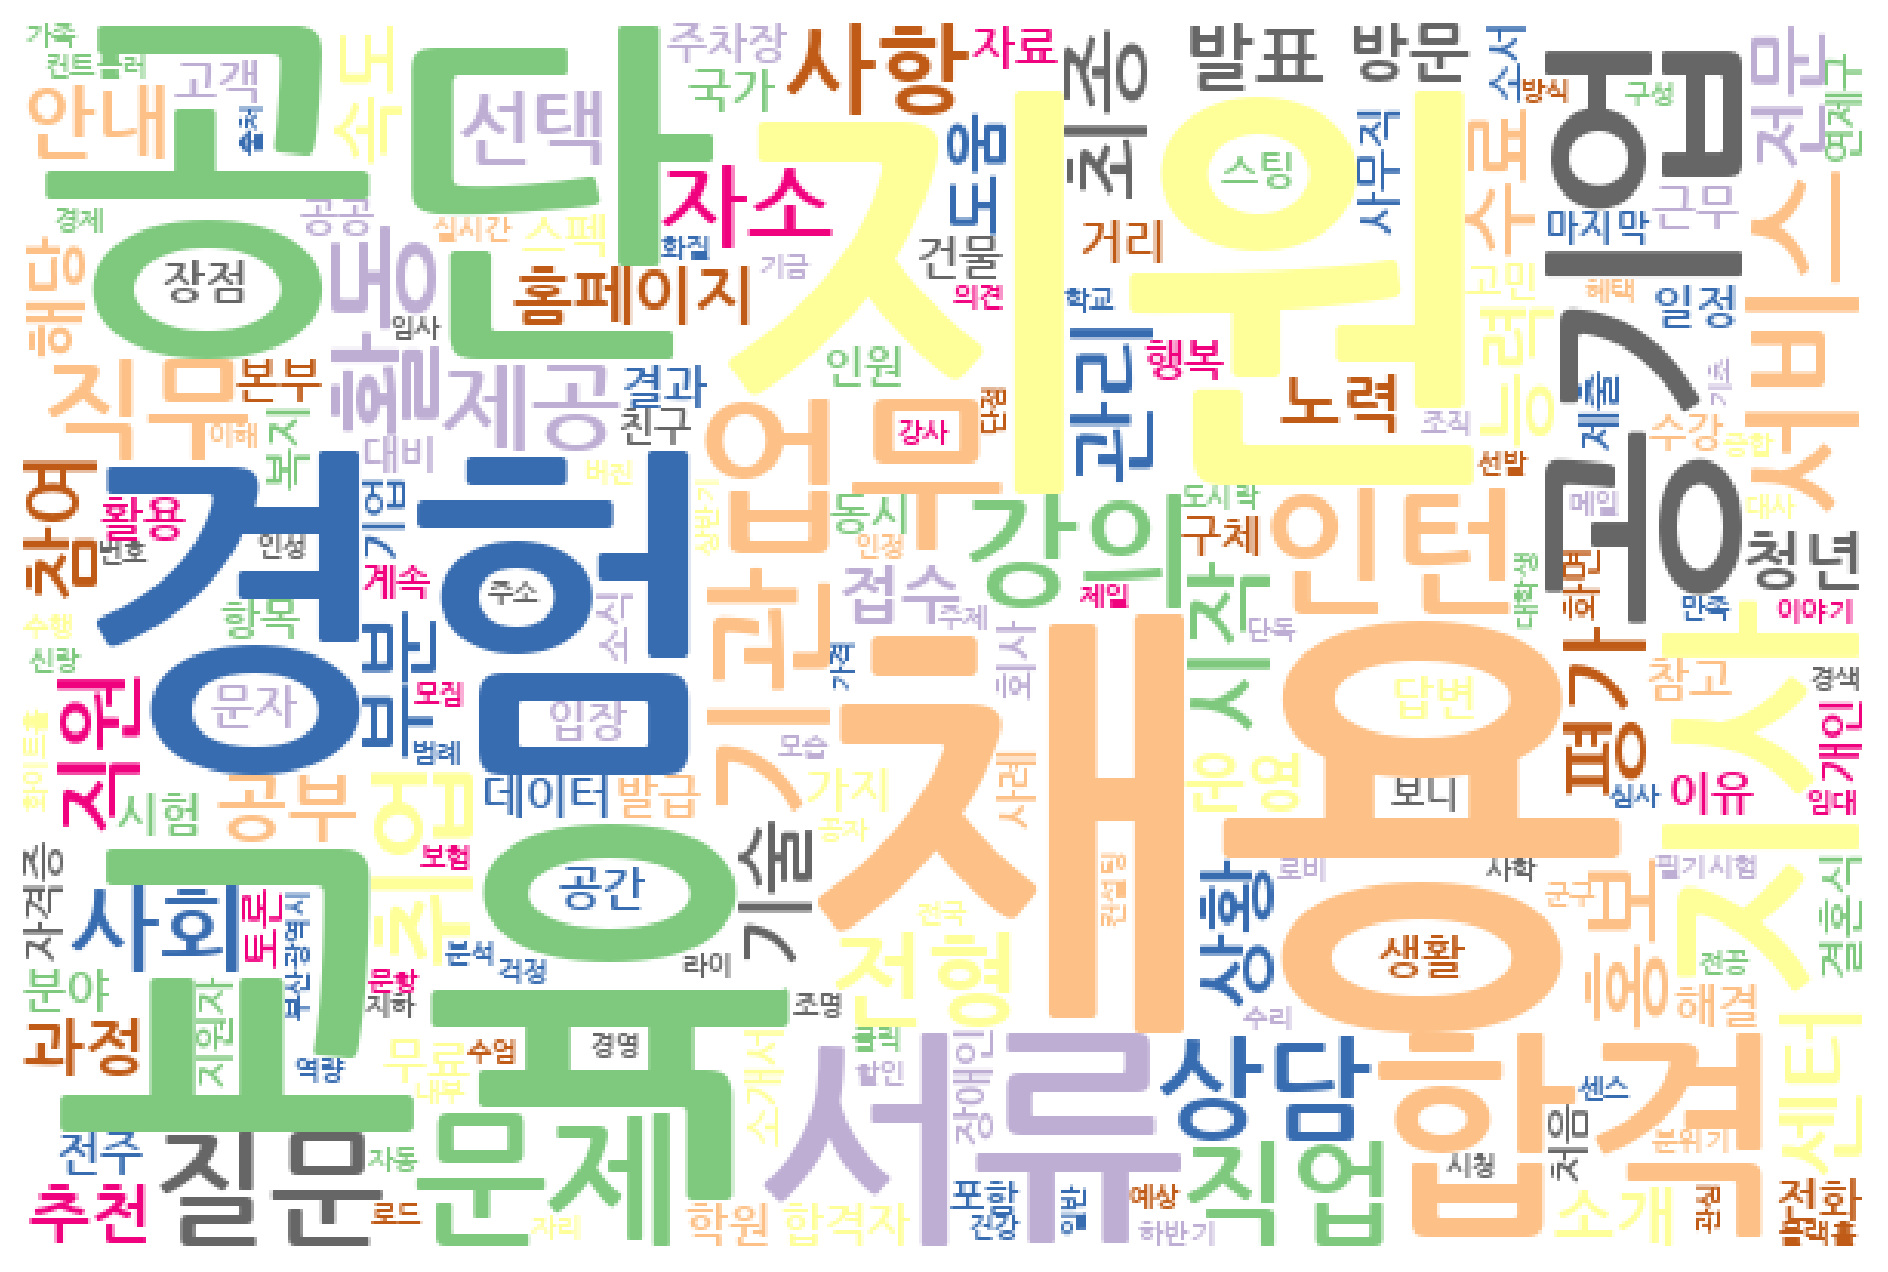

In [ ]:
count = Counter(topic3_nlist) # Counter 객체를 사용하여 topic0_nlist 리스트의 요소들을 카운트
hund3 = dict(count.most_common(500)) # 상위 500개 단어 출력

%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund3)
# 워드클라우드 출력

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

In [27]:
hund3

{'채용': 3216,
 '지원': 3003,
 '교육': 2619,
 '공단': 2112,
 '경험': 1989,
 '서류': 1929,
 '합격': 1834,
 '공기업': 1662,
 '지사': 1651,
 '업무': 1536,
 '문제': 1494,
 '인턴': 1417,
 '기관': 1362,
 '강의': 1338,
 '질문': 1326,
 '서비스': 1314,
 '상담': 1290,
 '직업': 1278,
 '활동': 1260,
 '직무': 1237,
 '취업': 1225,
 '전형': 1213,
 '사항': 1133,
 '제공': 1087,
 '사회': 1076,
 '시작': 1006,
 '자소': 993,
 '센터': 988,
 '최종': 974,
 '홍보': 965,
 '평가': 944,
 '관리': 910,
 '직원': 910,
 '선택': 896,
 '참여': 889,
 '상황': 887,
 '능력': 886,
 '수료': 881,
 '기술': 877,
 '부분': 875,
 '안내': 869,
 '전문': 868,
 '공부': 848,
 '발표': 838,
 '속도': 837,
 '홈페이지': 828,
 '과정': 824,
 '노력': 820,
 '소개': 820,
 '방문': 810,
 '추천': 808,
 '접수': 808,
 '운영': 793,
 '청년': 790,
 '도움': 780,
 '해당': 774,
 '데이터': 751,
 '국가': 749,
 '결과': 746,
 '근무': 745,
 '기업': 724,
 '거리': 714,
 '해결': 712,
 '건물': 707,
 '개인': 704,
 '생활': 694,
 '전화': 690,
 '전주': 687,
 '장점': 686,
 '가지': 667,
 '일정': 659,
 '참고': 654,
 '무료': 653,
 '시험': 639,
 '복지': 636,
 '합격자': 633,
 '답변': 633,
 '고객': 621,
 '분야': 620,
 '스펙': 619,
 '이유': 6

### 토픽 4

<function matplotlib.pyplot.show(close=None, block=None)>

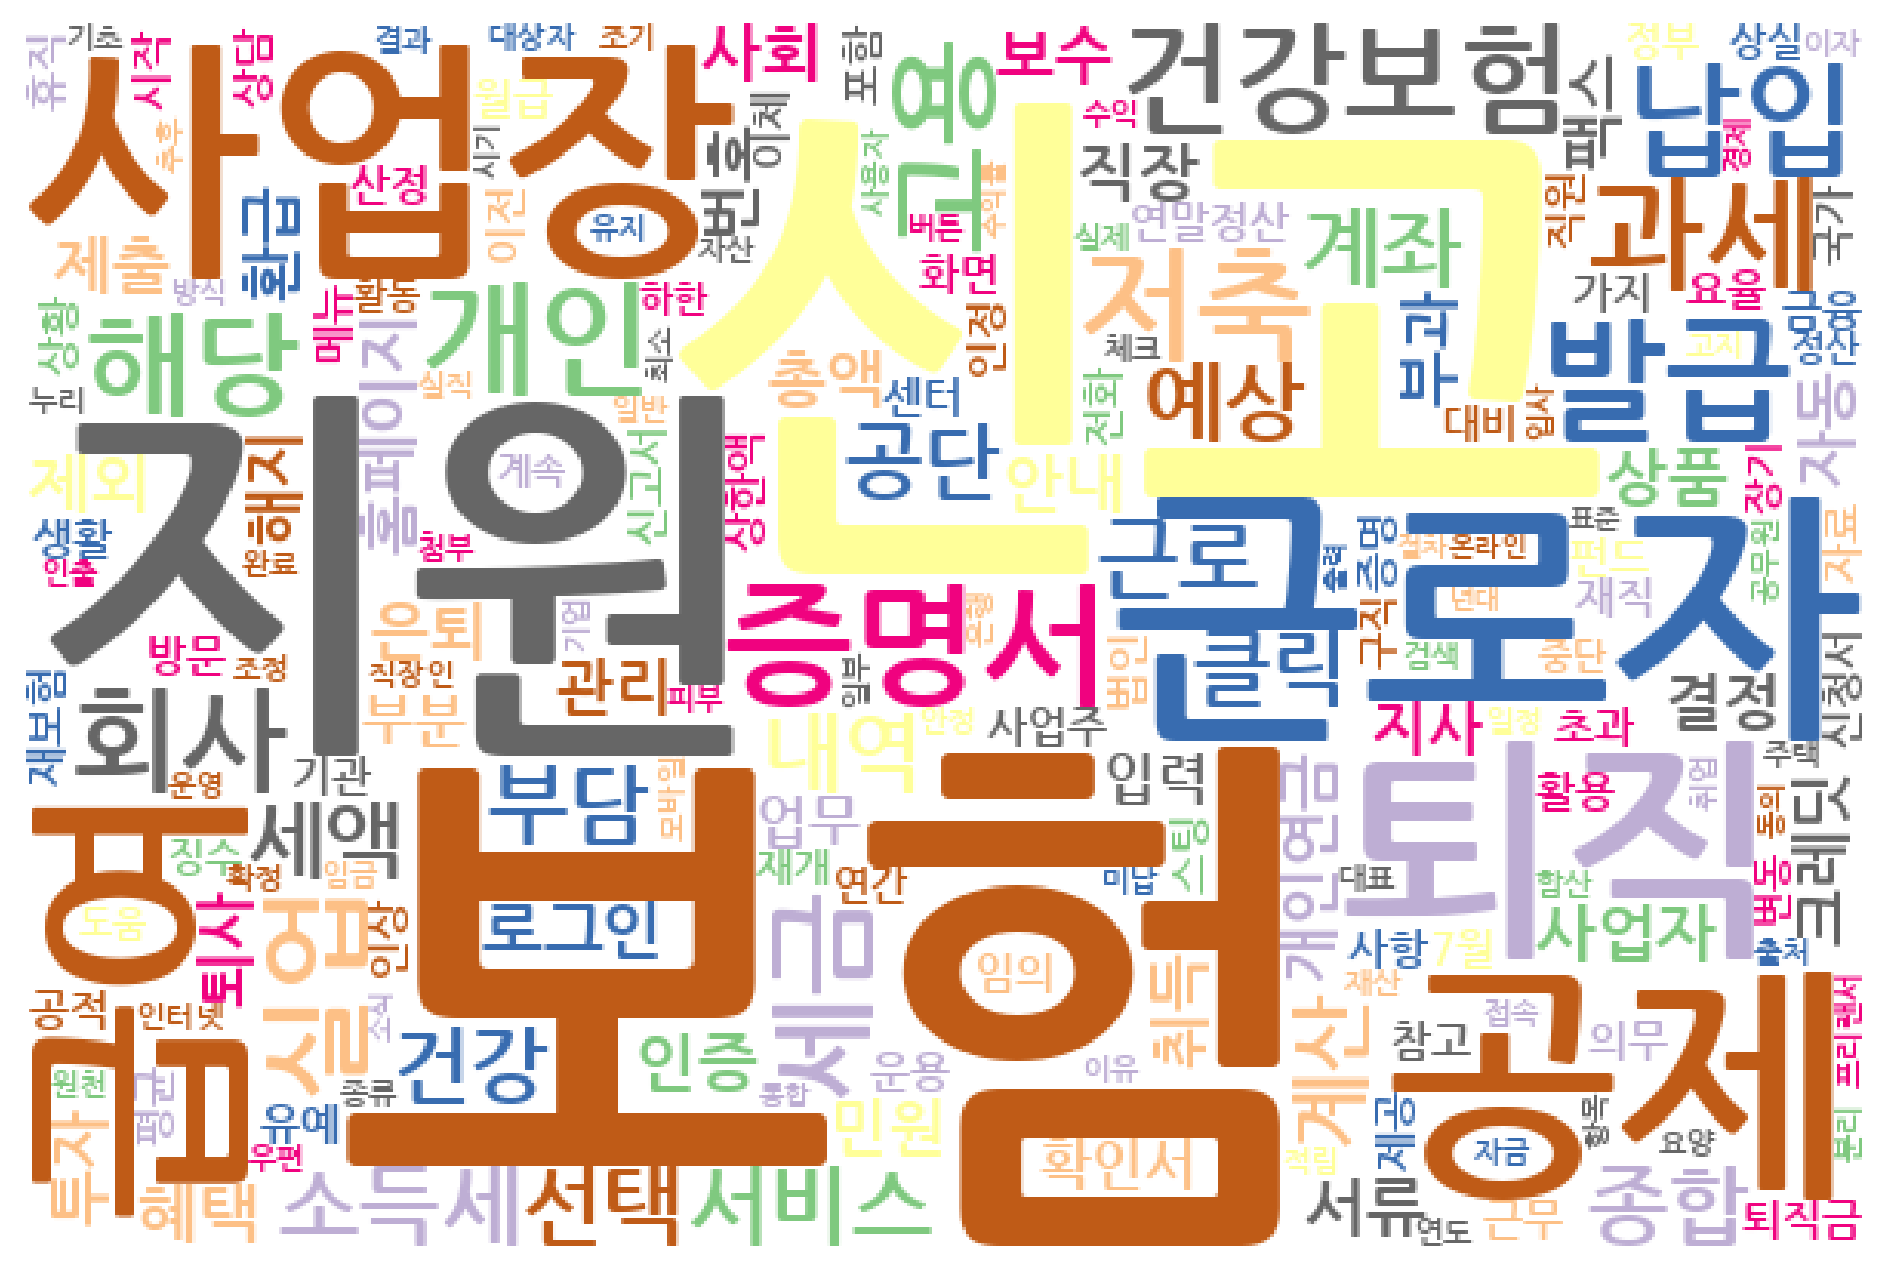

In [ ]:
count = Counter(topic4_nlist) # Counter 객체를 사용하여 topic0_nlist 리스트의 요소들을 카운트
hund4 = dict(count.most_common(500)) # 상위 500개 단어 출력

%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund4)
# 워드클라우드 출력

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

In [29]:
hund4

{'보험': 11923,
 '신고': 10657,
 '지원': 10023,
 '근로자': 9360,
 '사업장': 8557,
 '공제': 8215,
 '퇴직': 7545,
 '급여': 7316,
 '증명서': 6844,
 '발급': 6778,
 '납입': 5423,
 '과세': 5411,
 '개인': 5356,
 '저축': 5352,
 '건강보험': 5160,
 '실업': 4744,
 '해당': 4728,
 '회사': 4614,
 '고용': 4585,
 '세금': 4414,
 '소득세': 4360,
 '서비스': 4226,
 '선택': 4220,
 '부담': 4144,
 '근로': 4021,
 '계좌': 3975,
 '내역': 3929,
 '예상': 3902,
 '종합': 3800,
 '클릭': 3634,
 '공단': 3583,
 '계산': 3534,
 '건강': 3515,
 '세액': 3514,
 '사업자': 3174,
 '직장': 3157,
 '상품': 3026,
 '홈페이지': 3001,
 '사회': 2980,
 '로그인': 2917,
 '혜택': 2803,
 '제외': 2753,
 '서류': 2727,
 '인증': 2680,
 '안내': 2624,
 '부과': 2417,
 '크레딧': 2414,
 '개인연금': 2395,
 '제출': 2392,
 '은퇴': 2385,
 '보수': 2367,
 '관리': 2360,
 '결정': 2352,
 '환급': 2328,
 '자동': 2259,
 '민원': 2197,
 '총액': 2187,
 '팩스': 2157,
 '투자': 2137,
 '퇴사': 2113,
 '번호': 2105,
 '취득': 2093,
 '해지': 2034,
 '지사': 2027,
 '확인서': 2010,
 '입력': 1956,
 '부분': 1946,
 '업무': 1941,
 '연말정산': 1937,
 '운용': 1922,
 '가지': 1915,
 '생활': 1906,
 '포함': 1877,
 '펀드': 1873,
 '근무': 1871,
 '사항'

### 토픽 5

<function matplotlib.pyplot.show(close=None, block=None)>

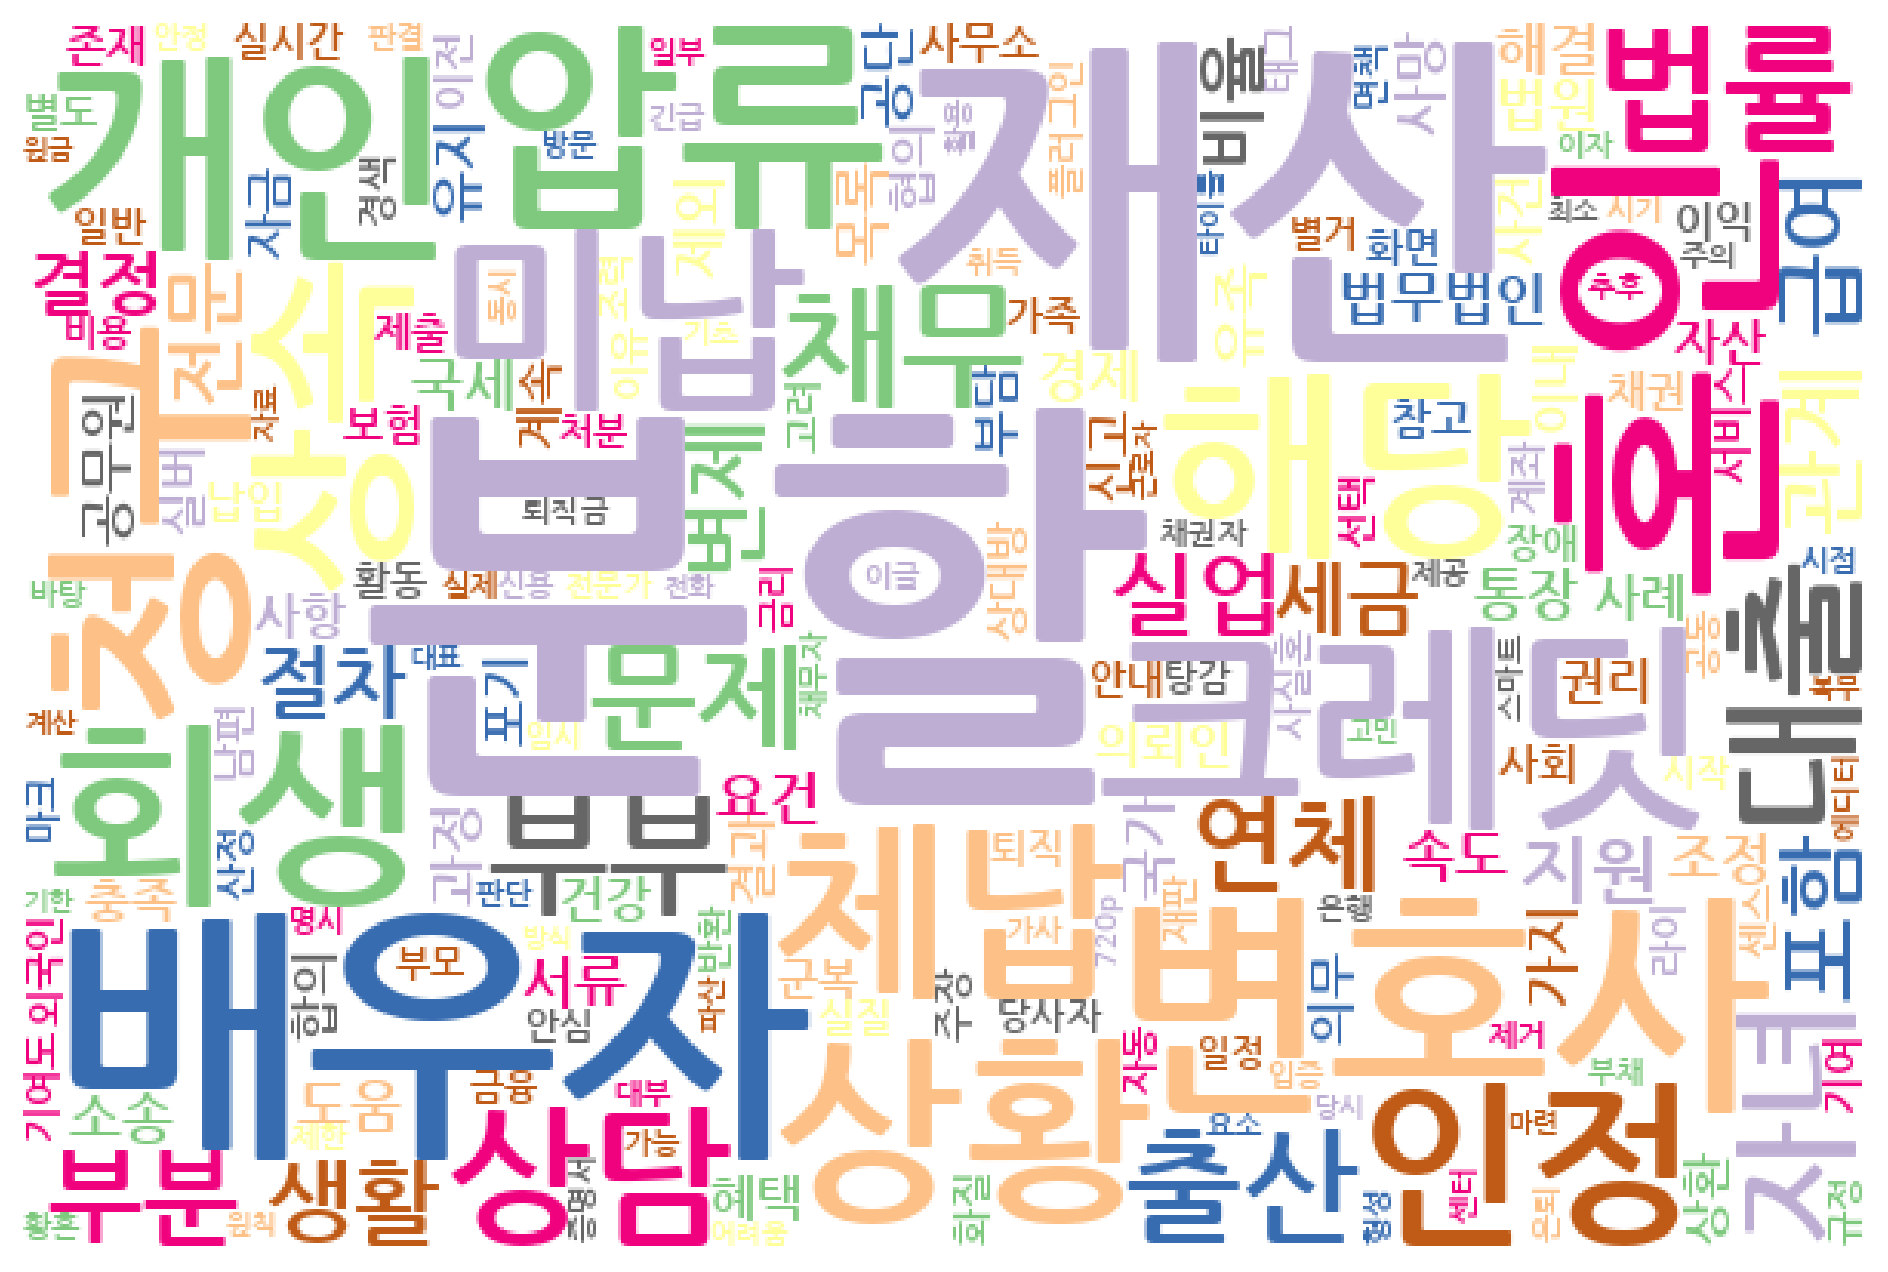

In [ ]:
count = Counter(topic5_nlist) # Counter 객체를 사용하여 topic0_nlist 리스트의 요소들을 카운트
hund5 = dict(count.most_common(500)) # 상위 500개 단어 출력

%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund5)
# 워드클라우드 출력
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

In [31]:
hund5

{'분할': 9059,
 '재산': 6033,
 '배우자': 3207,
 '혼인': 2669,
 '변호사': 2383,
 '압류': 2128,
 '개인': 2120,
 '크레딧': 2089,
 '청구': 2068,
 '상황': 1733,
 '해당': 1730,
 '회생': 1659,
 '미납': 1654,
 '체납': 1636,
 '인정': 1632,
 '상속': 1612,
 '상담': 1540,
 '대출': 1433,
 '법률': 1399,
 '채무': 1308,
 '부부': 1308,
 '자녀': 1301,
 '출산': 1257,
 '문제': 1186,
 '연체': 1184,
 '부분': 1166,
 '생활': 1147,
 '실업': 1145,
 '관계': 1135,
 '급여': 1090,
 '포함': 1088,
 '변제': 1027,
 '절차': 1013,
 '세금': 999,
 '전문': 995,
 '지원': 976,
 '결정': 964,
 '비율': 962,
 '법무법인': 957,
 '유족': 917,
 '통장': 913,
 '국세': 912,
 '요건': 896,
 '도움': 884,
 '소송': 858,
 '속도': 841,
 '사망': 798,
 '조정': 791,
 '경제': 769,
 '서류': 769,
 '해결': 759,
 '공무원': 752,
 '법원': 727,
 '유지': 724,
 '제외': 708,
 '과정': 684,
 '공단': 684,
 '목록': 679,
 '국가': 676,
 '가지': 667,
 '의뢰인': 667,
 '혜택': 663,
 '충족': 638,
 '사례': 630,
 '사항': 612,
 '자산': 611,
 '건강': 600,
 '자금': 587,
 '권리': 564,
 '사건': 554,
 '실버': 553,
 '신고': 551,
 '포기': 549,
 '상환': 545,
 '계속': 544,
 '부담': 541,
 '의무': 539,
 '합의': 532,
 '협의': 527,
 '결과': 526,


## 감성분석

### SentiwordNet(긍정, 부정, 중립)

In [65]:
import pandas as pd
import numpy as np
import itertools # 반복 객체를 유용하게 다루는 라이브러리
import re  # 정규표현식을 사용할 수 있는 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer  # tf-idf값을 구하기 위해서 사용
from collections import defaultdict
from collections import Counter   # 단어들을 쉽게 집계하는 라이브러리
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt   # 시각화하는 라이브러리
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')   # 선명하게 시각화
from sklearn.cluster import KMeans
from tqdm import trange, notebook
from matplotlib import rc, font_manager
import seaborn as sns

/tmp/ipykernel_35080/4200491039.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')   # 선명하게 시각화


In [ ]:
df= pd.read_pickle("../data/analysis_data/blog/pension_blog_topic_doc.pkl")

##  문서별 극성어휘,  극성값 부여, 감성점수(극성값들의 평균) 산출

In [ ]:
# 데이터프레임에 감성분석 score 삽입
import json
# 감정분석 json데이터(knu감성사전) 불러오기
with open('../data/SentiWord_info.json',encoding = 'UTF-8') as json_file:
    sentiword = json.load(json_file)

s_word = []  
values = []
score = []

def average(list):  # 각 문서의 평균 감성 score 반환  # 리스트의 평균 값을 계산하는 함수
    return sum(list)/len(list)

for word in notebook.tqdm(df['doc']):
    temp_s_word=[]    # 문서에서 발견된 감성 단어 리스트 초기화
    temp_value=[]
    
# 감성사전에 있는 단어와 현재 문서의 단어 비교
    for s in (sentiword):
        if s['word'] in word:
            if len(s['word']) > 1 : # 한글자 이상의 감성단어와 비교 
                temp_s_word.append(s['word'])
                temp_value.append(int(s['polarity'])) 
    s_word.append(temp_s_word) # 해당하는 감성단어 추가
    values.append(temp_value) # 해당 단어의 polarity값 추가
    try:
        score.append(average(temp_value)) # 각 문서의 평균 polarity 추가
    except ZeroDivisionError:
        score.append(int(0))

  0%|          | 0/21557 [00:00<?, ?it/s]

In [34]:
# 결과 데이터프레임에 감성분석 결과 삽입
df=df.assign(sentiword = s_word,values=values,score=score) # 결과 데이터프레임에 삽입

In [ ]:
df.to_pickle("../data/analysis_data/blog/pension_blog_sentiwordnet.pkl")

In [ ]:
df= pd.read_pickle("../data/analysis_data/blog/pension_blog_sentiwordnet.pkl")

In [49]:
# 감성 분석 결과를 바탕으로 긍정, 중립, 부정을 나타내는 sentiment 열 추가
senti = []

for i in trange(len(df)):
    if df['score'].iloc[i] <= -0.4:
        senti.append(-1)     # -0.4 이하인 경우 부정적으로 판단, -1로 표시
    elif df['score'].iloc[i] <= 0.4:
        senti.append(0)      # -0.4 초과 0.4 이하인 경우 중립적으로 판단, 0으로 표시
    else:
        senti.append(1)      # 0.4 초과인 경우 긍정적으로 판단, 1로 표시
    
df['sentiment'] = senti

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21557/21557 [00:00<00:00, 101169.51it/s]


In [50]:
df.columns

Index(['title', 'doc', 'like_cnt', 'comment_cnt', 'comment_list', 'img_cnt',
       'div_cnt', 'publish_date', 'ch', 'ch2', 'img', 'title_token_list_pos',
       'title_token_noun', 'doc_token_noun', 'doc_token_list_pos',
       'comment_token_list_pos', 'comment_token_noun', 'doc_topic',
       'sentiword', 'values', 'score', 'sentiment'],
      dtype='object')

In [52]:
df.columns= ['title', 'doc', 'like_cnt', 'comment_cnt', 'comment_list', 'img_cnt',
       'div_cnt', 'published_date', 'ch', 'ch2', 'img', 'title_token_list_pos',
       'title_token_noun', 'doc_token_noun', 'doc_token_list_pos',
       'comment_token_list_pos', 'comment_token_noun', 'doc_topic',
       'sentiword', 'values', 'score', 'sentiment']

# topic 0에 대한 긍부정 그래프

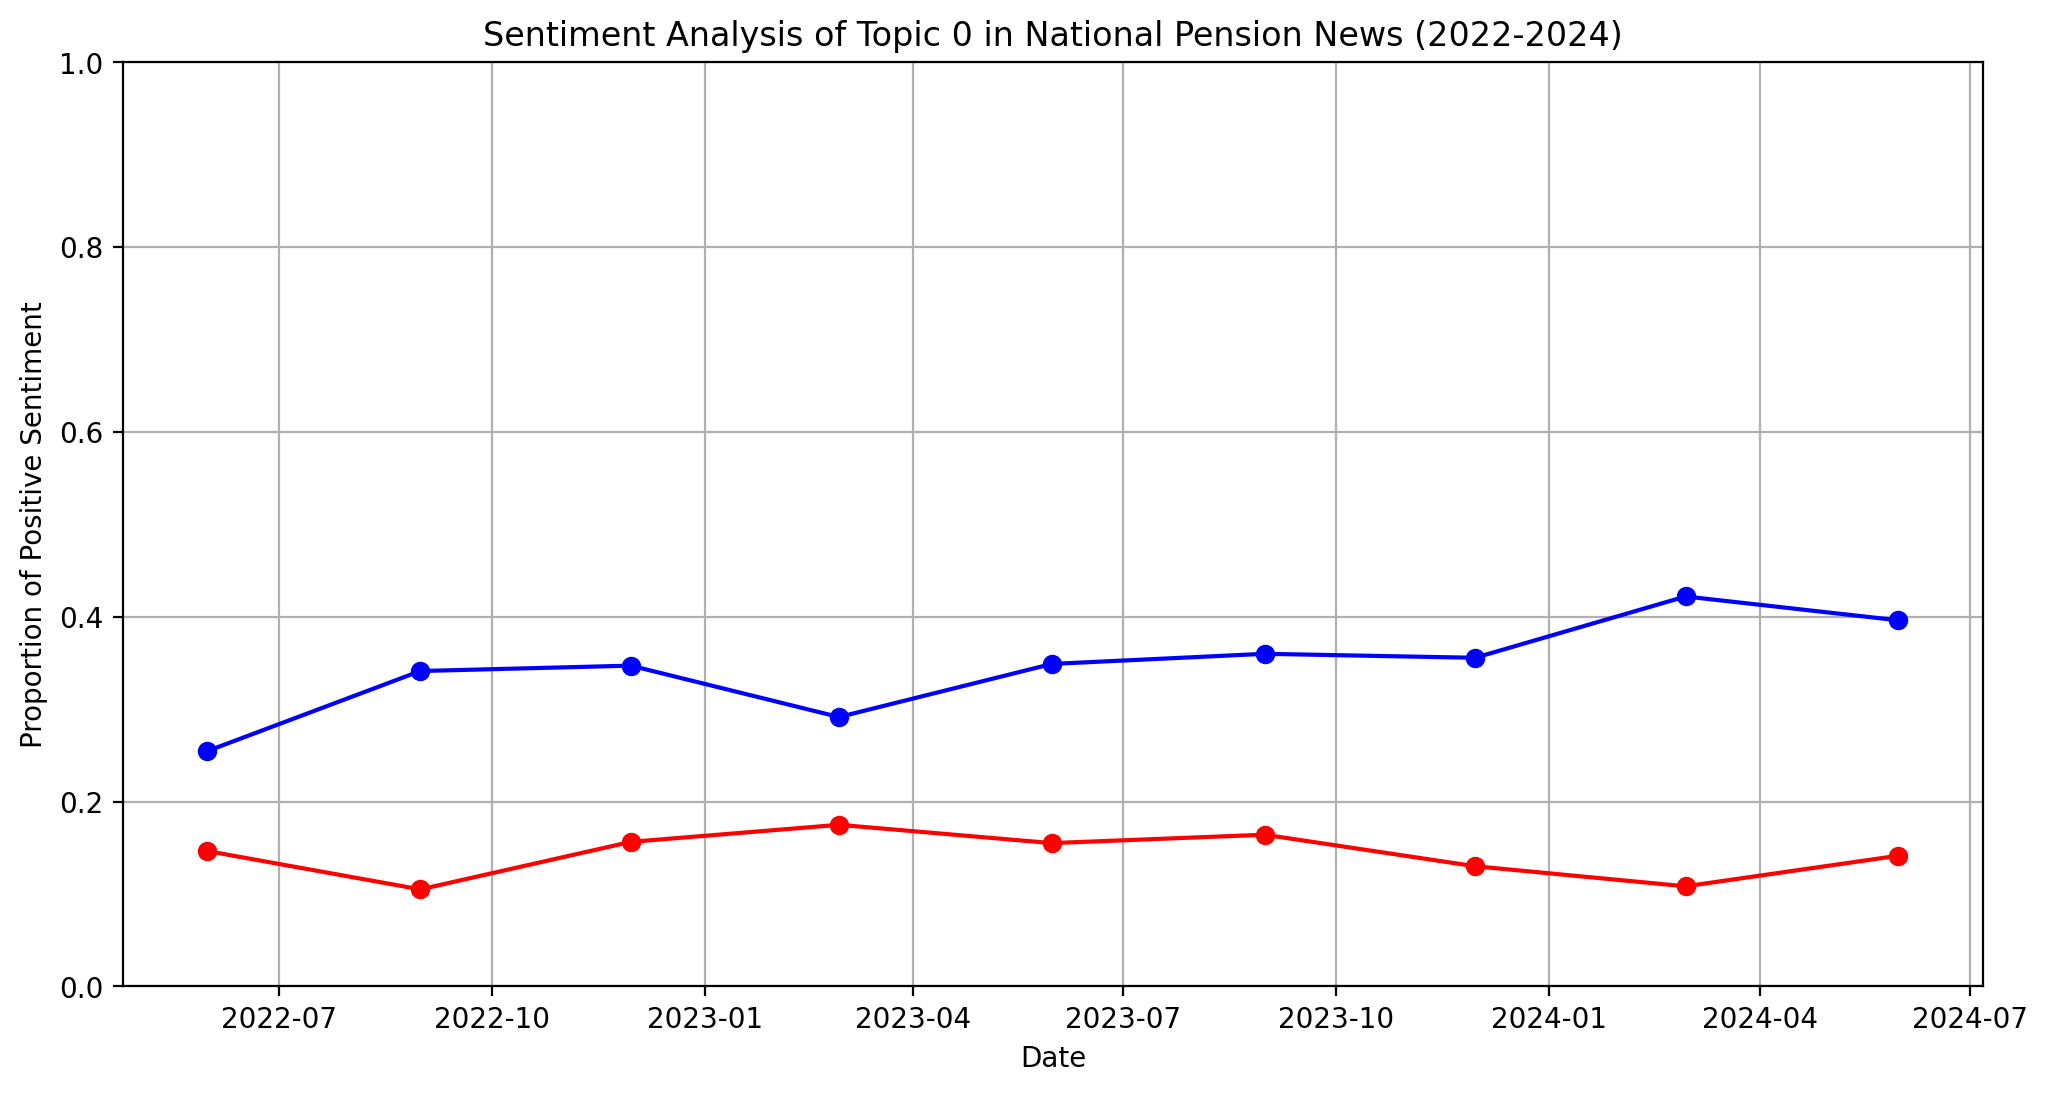

In [67]:
# 1. 데이터 로드
# 감성분석 및 토픽 분류가 완료된 데이터 로드
topic_sentiment_data = df.copy()

# 새 원본 데이터 로드 (날짜 데이터 포함)
original_data = df.copy()

# 2. 고유 식별자 생성
# 예시로 'title'과 'doc'을 기준으로 고유 식별자를 생성
original_data['uid'] = original_data['title'] + original_data['doc']
topic_sentiment_data['uid'] = topic_sentiment_data['title'] + topic_sentiment_data['doc']

# 3. 데이터 병합
merged_data = pd.merge(topic_sentiment_data, original_data[['uid', 'published_date']], on='uid', how='left')

# 4. 결측값 처리
merged_data.dropna(subset=['published_date_x'], inplace=True)


# 5. 데이터 전처리
start_date = '2022-05-01'
end_date = '2024-04-30'
filtered_data = merged_data[(merged_data['published_date_y'] >= start_date) & (merged_data['published_date_y'] <= end_date)]

# 특정 토픽에 대한 데이터 필터링 (예: topic 1)
topic_data = filtered_data[filtered_data['doc_topic'] == 0]

# 3개월 단위로 데이터 그룹화
topic_data.set_index('published_date_y', inplace=True)
grouped_data = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == 1).mean())

# 6. 감성 분석 결과 계산
# 그룹 내에서 긍정적인 문서 비율 계산은 이미 apply에서 처리됨
# 7. 시계열 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data, marker='o', linestyle='-', color='blue')
plt.plot(topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean()).index, topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean()), marker='o', linestyle='-', color='red')
plt.title('Sentiment Analysis of Topic 0 in National Pension News (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Proportion of Positive Sentiment')
plt.grid(True)
plt.ylim(0,1)
plt.show()


# topic 1에 대한 긍부정 그래프

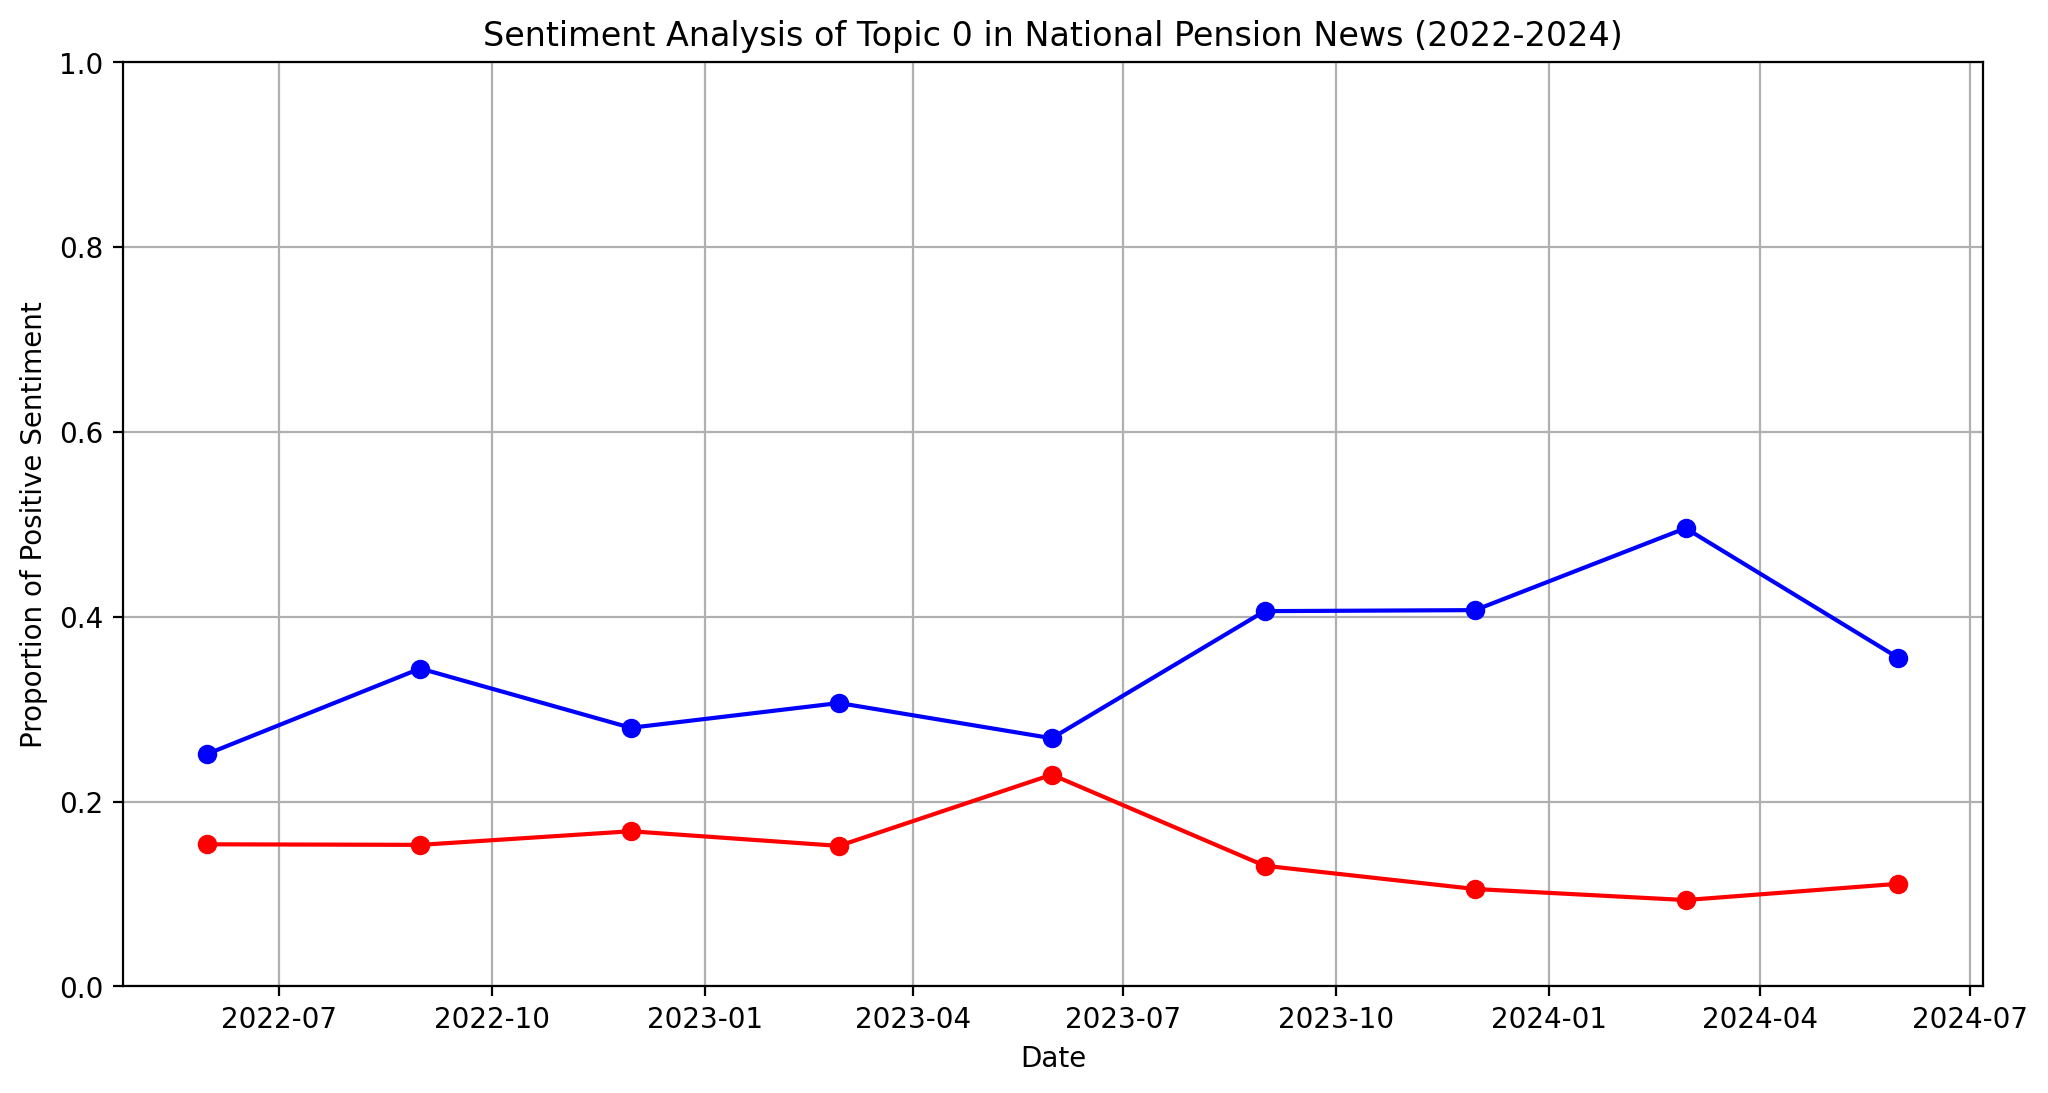

In [68]:
# 1. 데이터 로드
# 감성분석 및 토픽 분류가 완료된 데이터 로드
topic_sentiment_data = df.copy()

# 새 원본 데이터 로드 (날짜 데이터 포함)
original_data = df.copy()

# 2. 고유 식별자 생성
# 예시로 'title'과 'doc'을 기준으로 고유 식별자를 생성
original_data['uid'] = original_data['title'] + original_data['doc']
topic_sentiment_data['uid'] = topic_sentiment_data['title'] + topic_sentiment_data['doc']

# 3. 데이터 병합
merged_data = pd.merge(topic_sentiment_data, original_data[['uid', 'published_date']], on='uid', how='left')

# 4. 결측값 처리
merged_data.dropna(subset=['published_date_x'], inplace=True)


# 5. 데이터 전처리
start_date = '2022-05-01'
end_date = '2024-04-30'
filtered_data = merged_data[(merged_data['published_date_y'] >= start_date) & (merged_data['published_date_y'] <= end_date)]

# 특정 토픽에 대한 데이터 필터링 (예: topic 1)
topic_data = filtered_data[filtered_data['doc_topic'] == 1]

# 3개월 단위로 데이터 그룹화
topic_data.set_index('published_date_y', inplace=True)
grouped_data = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == 1).mean())

# 6. 감성 분석 결과 계산
# 그룹 내에서 긍정적인 문서 비율 계산은 이미 apply에서 처리됨
# 7. 시계열 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data, marker='o', linestyle='-', color='blue')
plt.plot(topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean()).index, topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean()), marker='o', linestyle='-', color='red')
plt.title('Sentiment Analysis of Topic 1 in National Pension News (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Proportion of Positive Sentiment')
plt.grid(True)
plt.ylim(0,1)
plt.show()


# topic 2에 대한 긍부정 그래프

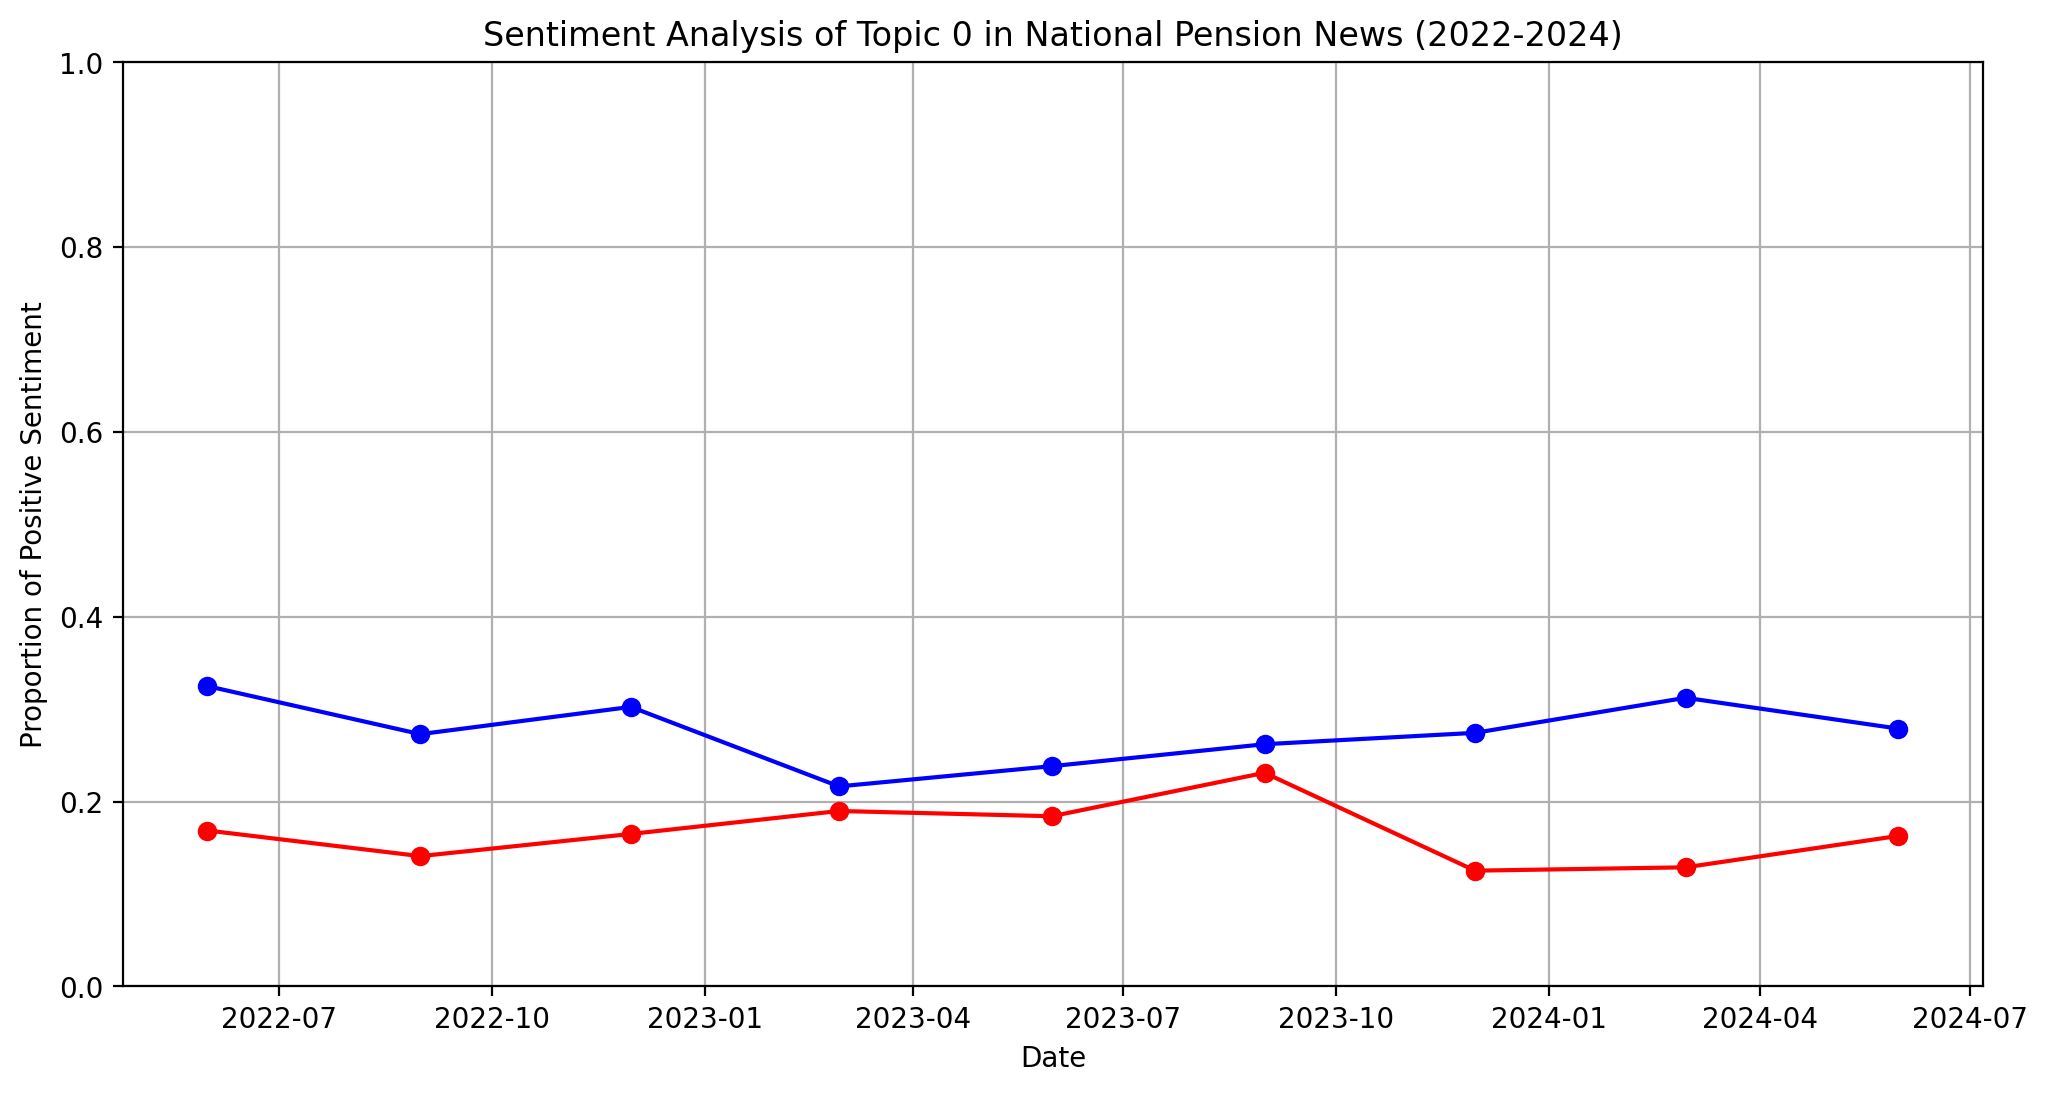

In [69]:
# 1. 데이터 로드
# 감성분석 및 토픽 분류가 완료된 데이터 로드
topic_sentiment_data = df.copy()

# 새 원본 데이터 로드 (날짜 데이터 포함)
original_data = df.copy()

# 2. 고유 식별자 생성
# 예시로 'title'과 'doc'을 기준으로 고유 식별자를 생성
original_data['uid'] = original_data['title'] + original_data['doc']
topic_sentiment_data['uid'] = topic_sentiment_data['title'] + topic_sentiment_data['doc']

# 3. 데이터 병합
merged_data = pd.merge(topic_sentiment_data, original_data[['uid', 'published_date']], on='uid', how='left')

# 4. 결측값 처리
merged_data.dropna(subset=['published_date_x'], inplace=True)


# 5. 데이터 전처리
start_date = '2022-05-01'
end_date = '2024-04-30'
filtered_data = merged_data[(merged_data['published_date_y'] >= start_date) & (merged_data['published_date_y'] <= end_date)]

# 특정 토픽에 대한 데이터 필터링 (예: topic 1)
topic_data = filtered_data[filtered_data['doc_topic'] == 2]

# 3개월 단위로 데이터 그룹화
topic_data.set_index('published_date_y', inplace=True)
grouped_data = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == 1).mean())

# 6. 감성 분석 결과 계산
# 그룹 내에서 긍정적인 문서 비율 계산은 이미 apply에서 처리됨
# 7. 시계열 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data, marker='o', linestyle='-', color='blue')
plt.plot(topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean()).index, topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean()), marker='o', linestyle='-', color='red')
plt.title('Sentiment Analysis of Topic 2 in National Pension News (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Proportion of Positive Sentiment')
plt.grid(True)
plt.ylim(0,1)
plt.show()


# topic 3에 대한 긍부정 그래프

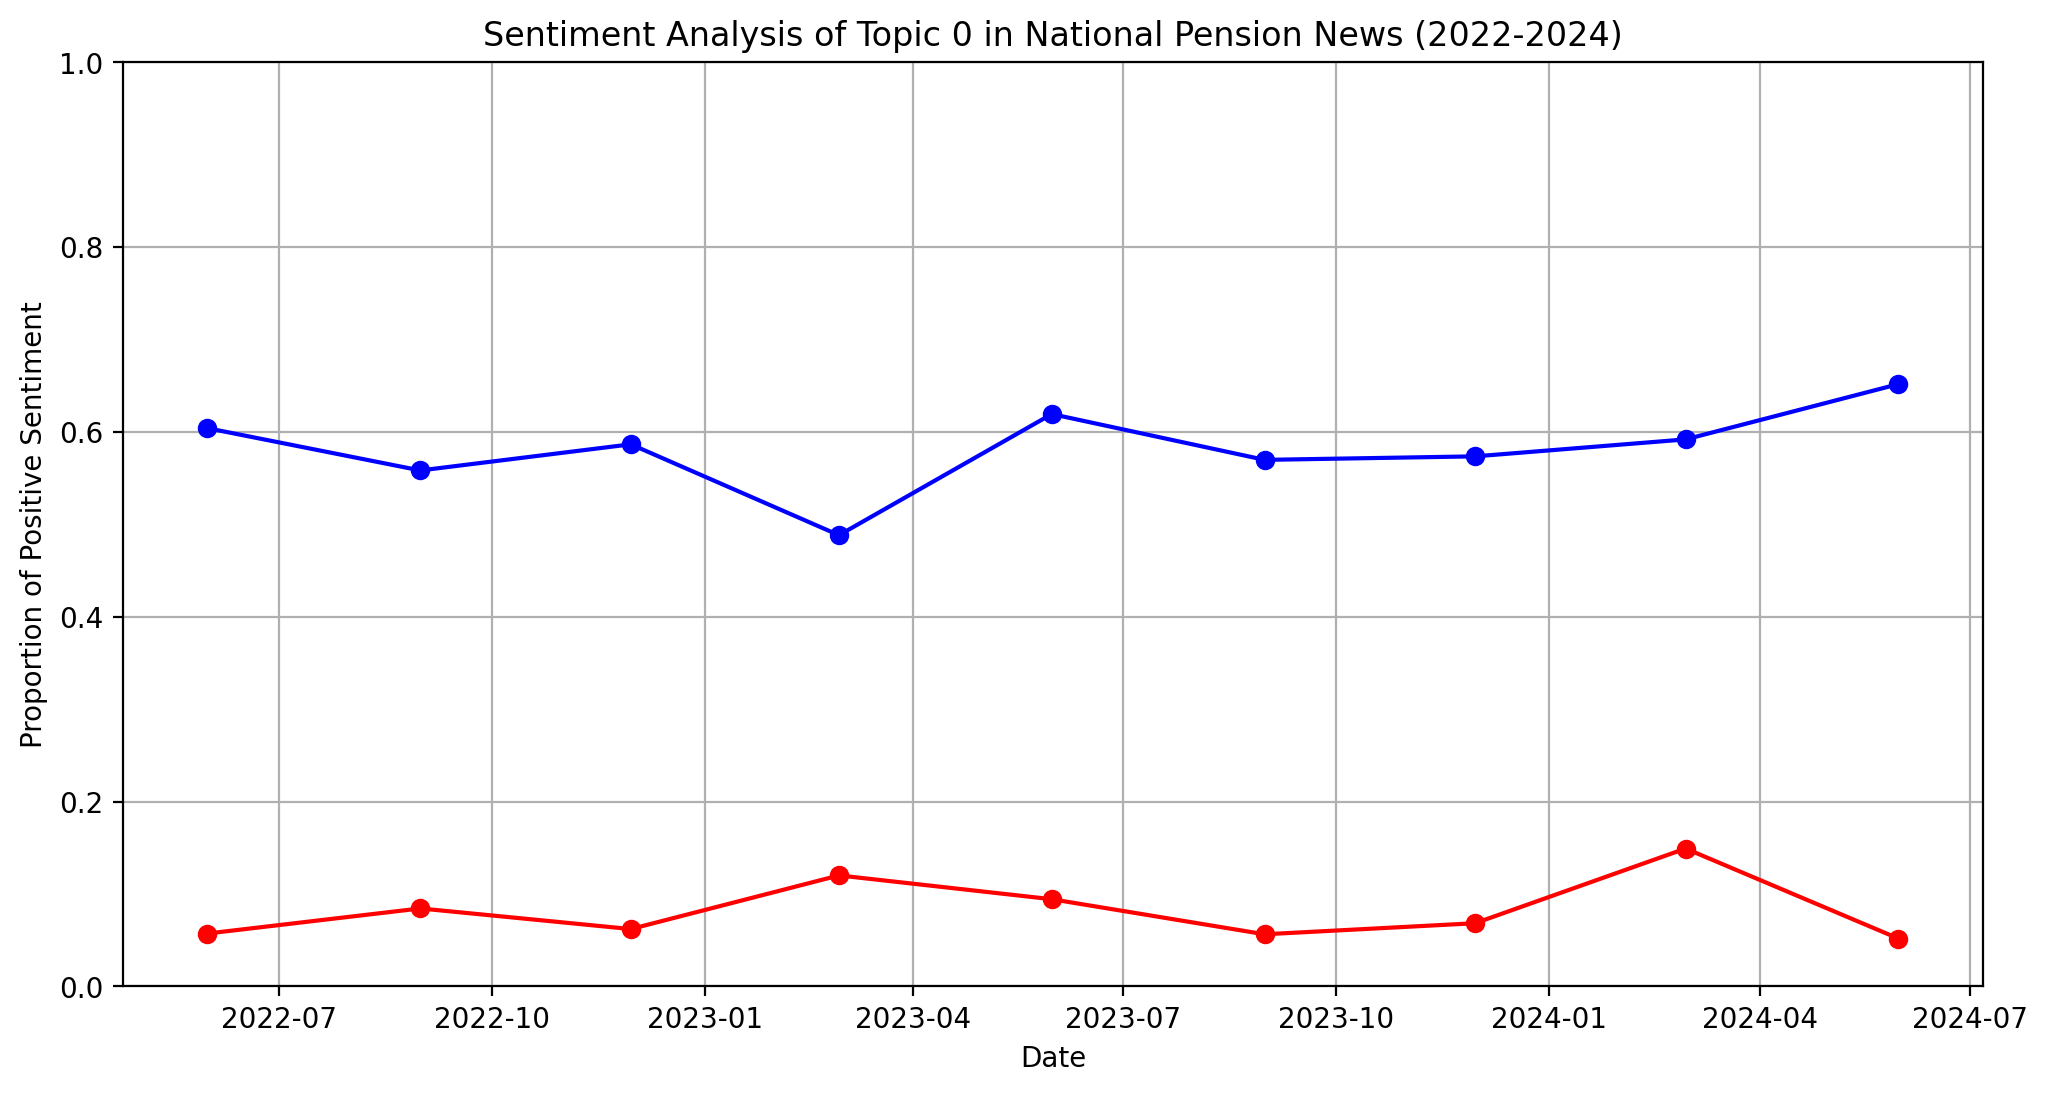

In [70]:
# 1. 데이터 로드
# 감성분석 및 토픽 분류가 완료된 데이터 로드
topic_sentiment_data = df.copy()

# 새 원본 데이터 로드 (날짜 데이터 포함)
original_data = df.copy()

# 2. 고유 식별자 생성
# 예시로 'title'과 'doc'을 기준으로 고유 식별자를 생성
original_data['uid'] = original_data['title'] + original_data['doc']
topic_sentiment_data['uid'] = topic_sentiment_data['title'] + topic_sentiment_data['doc']

# 3. 데이터 병합
merged_data = pd.merge(topic_sentiment_data, original_data[['uid', 'published_date']], on='uid', how='left')

# 4. 결측값 처리
merged_data.dropna(subset=['published_date_x'], inplace=True)


# 5. 데이터 전처리
start_date = '2022-05-01'
end_date = '2024-04-30'
filtered_data = merged_data[(merged_data['published_date_y'] >= start_date) & (merged_data['published_date_y'] <= end_date)]

# 특정 토픽에 대한 데이터 필터링 (예: topic 1)
topic_data = filtered_data[filtered_data['doc_topic'] == 3]

# 3개월 단위로 데이터 그룹화
topic_data.set_index('published_date_y', inplace=True)
grouped_data = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == 1).mean())

# 6. 감성 분석 결과 계산
# 그룹 내에서 긍정적인 문서 비율 계산은 이미 apply에서 처리됨
# 7. 시계열 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data, marker='o', linestyle='-', color='blue')
plt.plot(topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean()).index, topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean()), marker='o', linestyle='-', color='red')
plt.title('Sentiment Analysis of Topic 3 in National Pension News (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Proportion of Positive Sentiment')
plt.grid(True)
plt.ylim(0,1)
plt.show()


# topic 4에 대한 긍부정 그래프

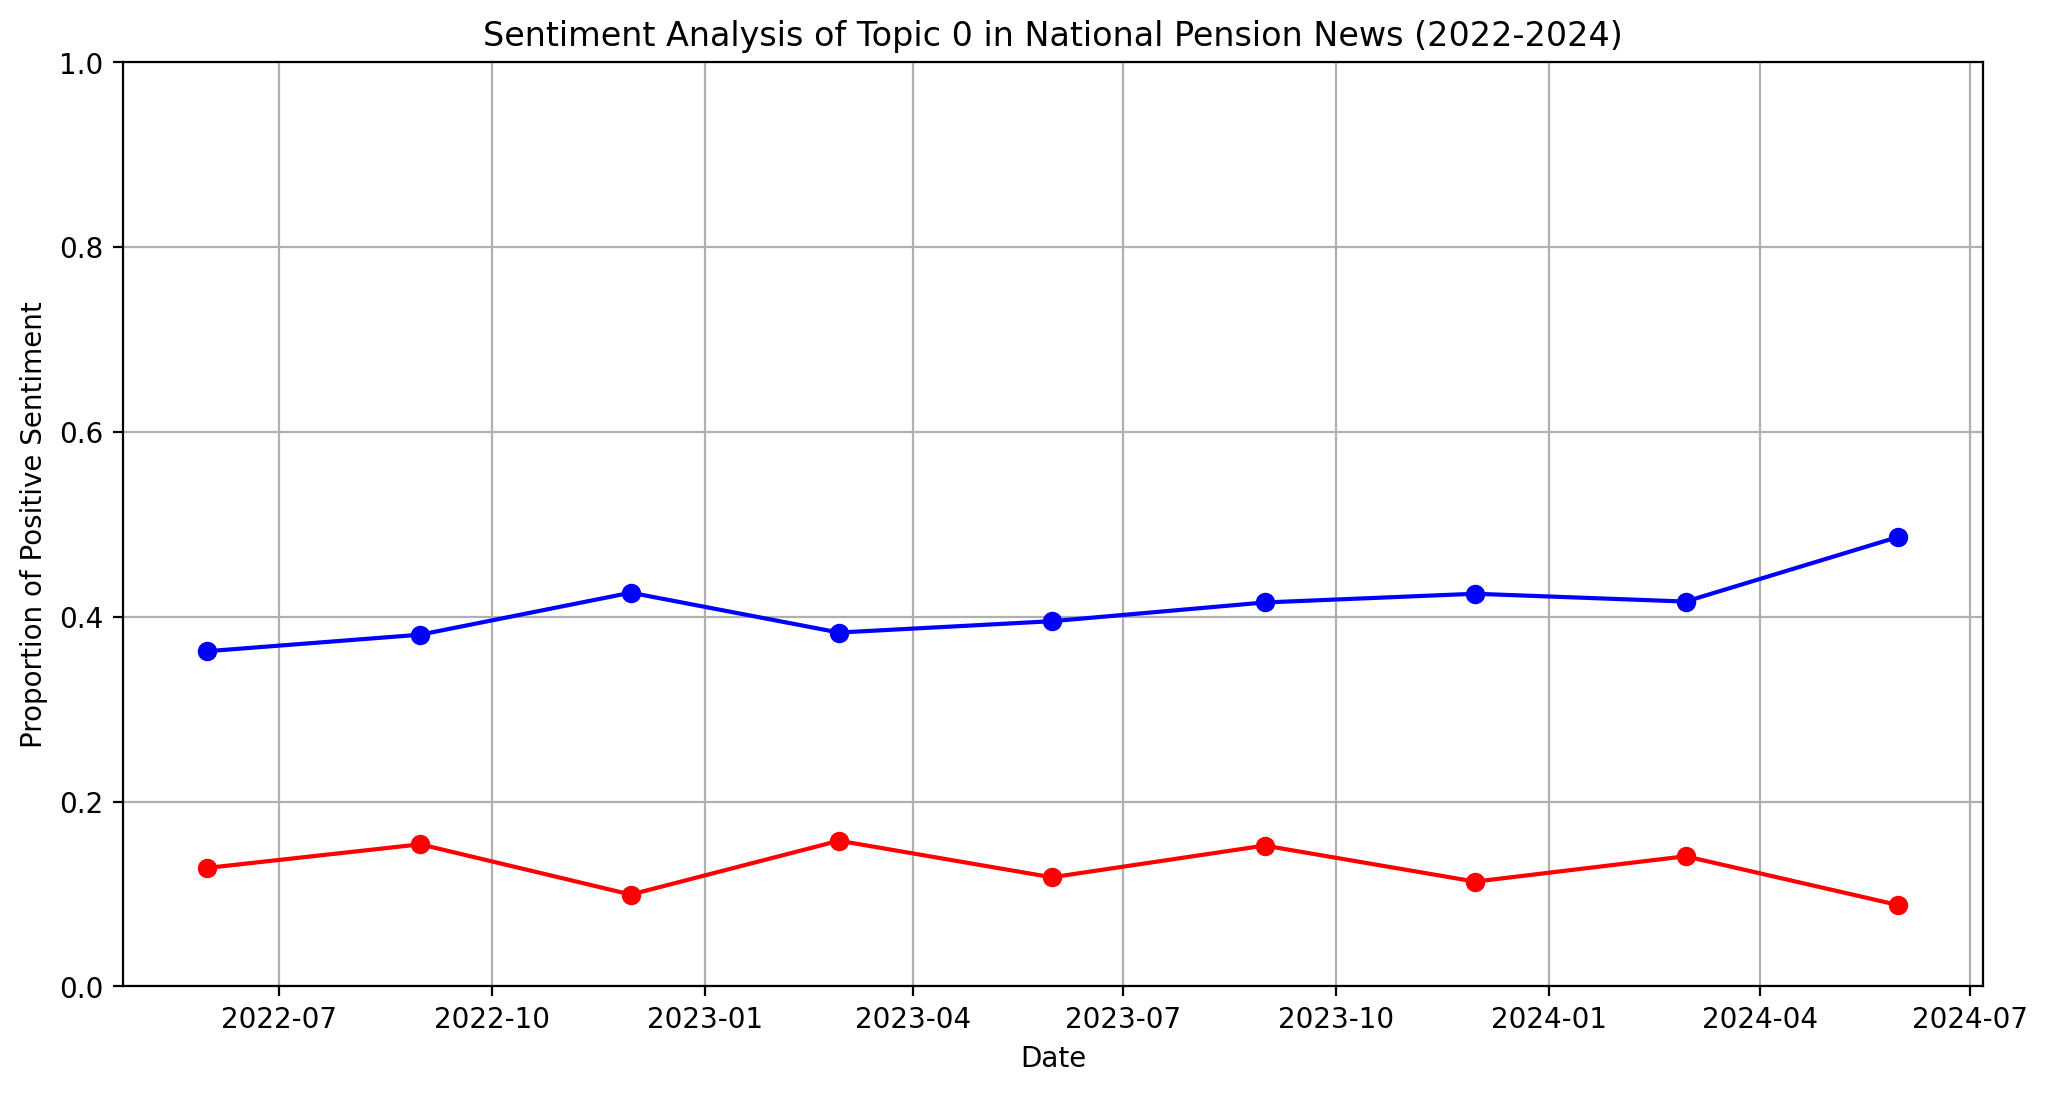

In [71]:
# 1. 데이터 로드
# 감성분석 및 토픽 분류가 완료된 데이터 로드
topic_sentiment_data = df.copy()

# 새 원본 데이터 로드 (날짜 데이터 포함)
original_data = df.copy()

# 2. 고유 식별자 생성
# 예시로 'title'과 'doc'을 기준으로 고유 식별자를 생성
original_data['uid'] = original_data['title'] + original_data['doc']
topic_sentiment_data['uid'] = topic_sentiment_data['title'] + topic_sentiment_data['doc']

# 3. 데이터 병합
merged_data = pd.merge(topic_sentiment_data, original_data[['uid', 'published_date']], on='uid', how='left')

# 4. 결측값 처리
merged_data.dropna(subset=['published_date_x'], inplace=True)


# 5. 데이터 전처리
start_date = '2022-05-01'
end_date = '2024-04-30'
filtered_data = merged_data[(merged_data['published_date_y'] >= start_date) & (merged_data['published_date_y'] <= end_date)]

# 특정 토픽에 대한 데이터 필터링 (예: topic 1)
topic_data = filtered_data[filtered_data['doc_topic'] == 4]

# 3개월 단위로 데이터 그룹화
topic_data.set_index('published_date_y', inplace=True)
grouped_data = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == 1).mean())

# 6. 감성 분석 결과 계산
# 그룹 내에서 긍정적인 문서 비율 계산은 이미 apply에서 처리됨
# 7. 시계열 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data, marker='o', linestyle='-', color='blue')
plt.plot(topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean()).index, topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean()), marker='o', linestyle='-', color='red')
plt.title('Sentiment Analysis of Topic 4 in National Pension News (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Proportion of Positive Sentiment')
plt.grid(True)
plt.ylim(0,1)
plt.show()


# topic 5에 대한 긍부정 그래프

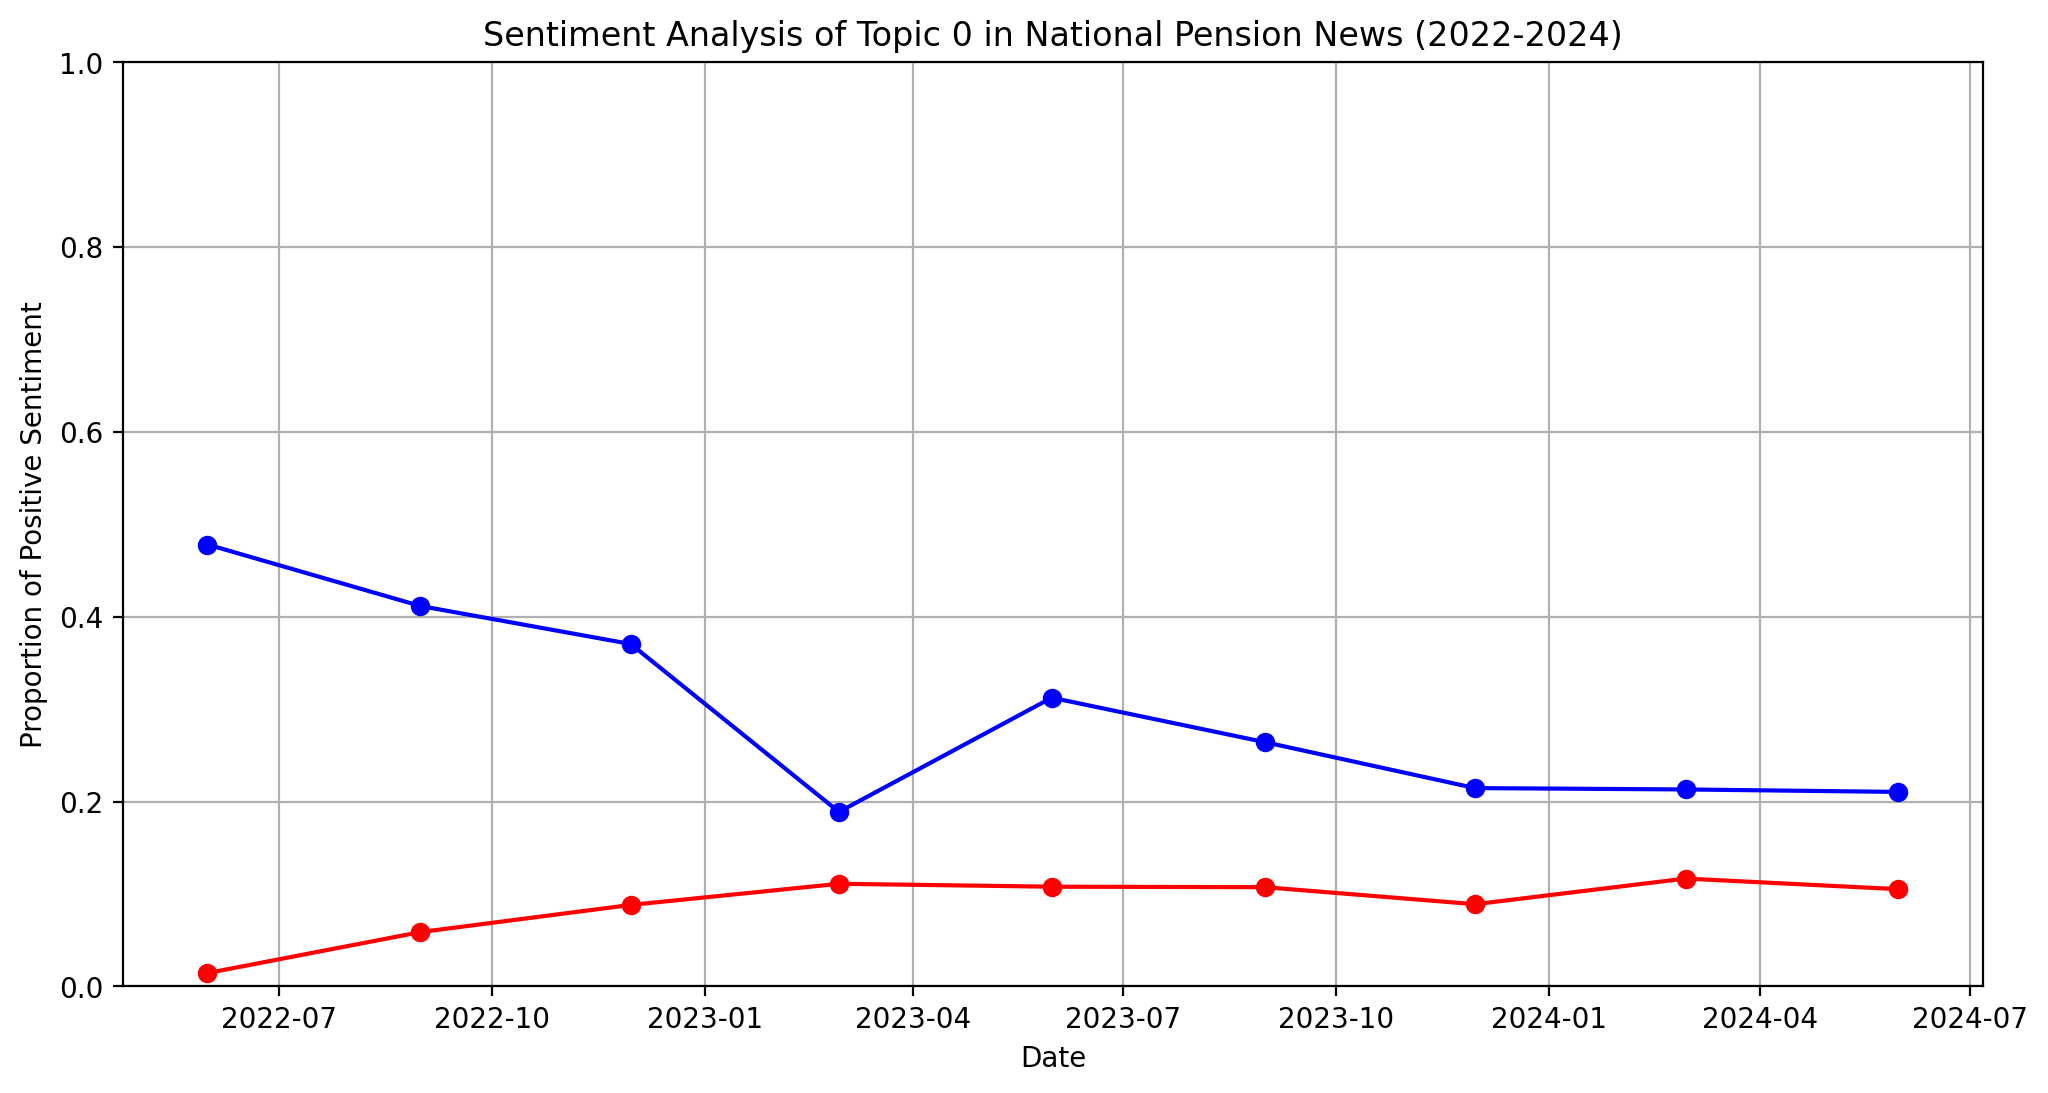

In [74]:
# 1. 데이터 로드
# 감성분석 및 토픽 분류가 완료된 데이터 로드
topic_sentiment_data = df.copy()

# 새 원본 데이터 로드 (날짜 데이터 포함)
original_data = df.copy()

# 2. 고유 식별자 생성
# 예시로 'title'과 'doc'을 기준으로 고유 식별자를 생성
original_data['uid'] = original_data['title'] + original_data['doc']
topic_sentiment_data['uid'] = topic_sentiment_data['title'] + topic_sentiment_data['doc']

# 3. 데이터 병합
merged_data = pd.merge(topic_sentiment_data, original_data[['uid', 'published_date']], on='uid', how='left')

# 4. 결측값 처리
merged_data.dropna(subset=['published_date_x'], inplace=True)


# 5. 데이터 전처리
start_date = '2022-05-01'
end_date = '2024-04-30'
filtered_data = merged_data[(merged_data['published_date_y'] >= start_date) & (merged_data['published_date_y'] <= end_date)]

# 특정 토픽에 대한 데이터 필터링 (예: topic 1)
topic_data = filtered_data[filtered_data['doc_topic'] == 5]

# 3개월 단위로 데이터 그룹화
topic_data.set_index('published_date_y', inplace=True)
grouped_data = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == 1).mean())

# 6. 감성 분석 결과 계산
# 그룹 내에서 긍정적인 문서 비율 계산은 이미 apply에서 처리됨
# 7. 시계열 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data, marker='o', linestyle='-', color='blue')
plt.plot(topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean()).index, topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean()), marker='o', linestyle='-', color='red')
plt.title('Sentiment Analysis of Topic 5 in National Pension News (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Proportion of Positive Sentiment')
plt.grid(True)
plt.ylim(0,1)
plt.show()


# **전체 토픽에 대해 긍부정 그래프**

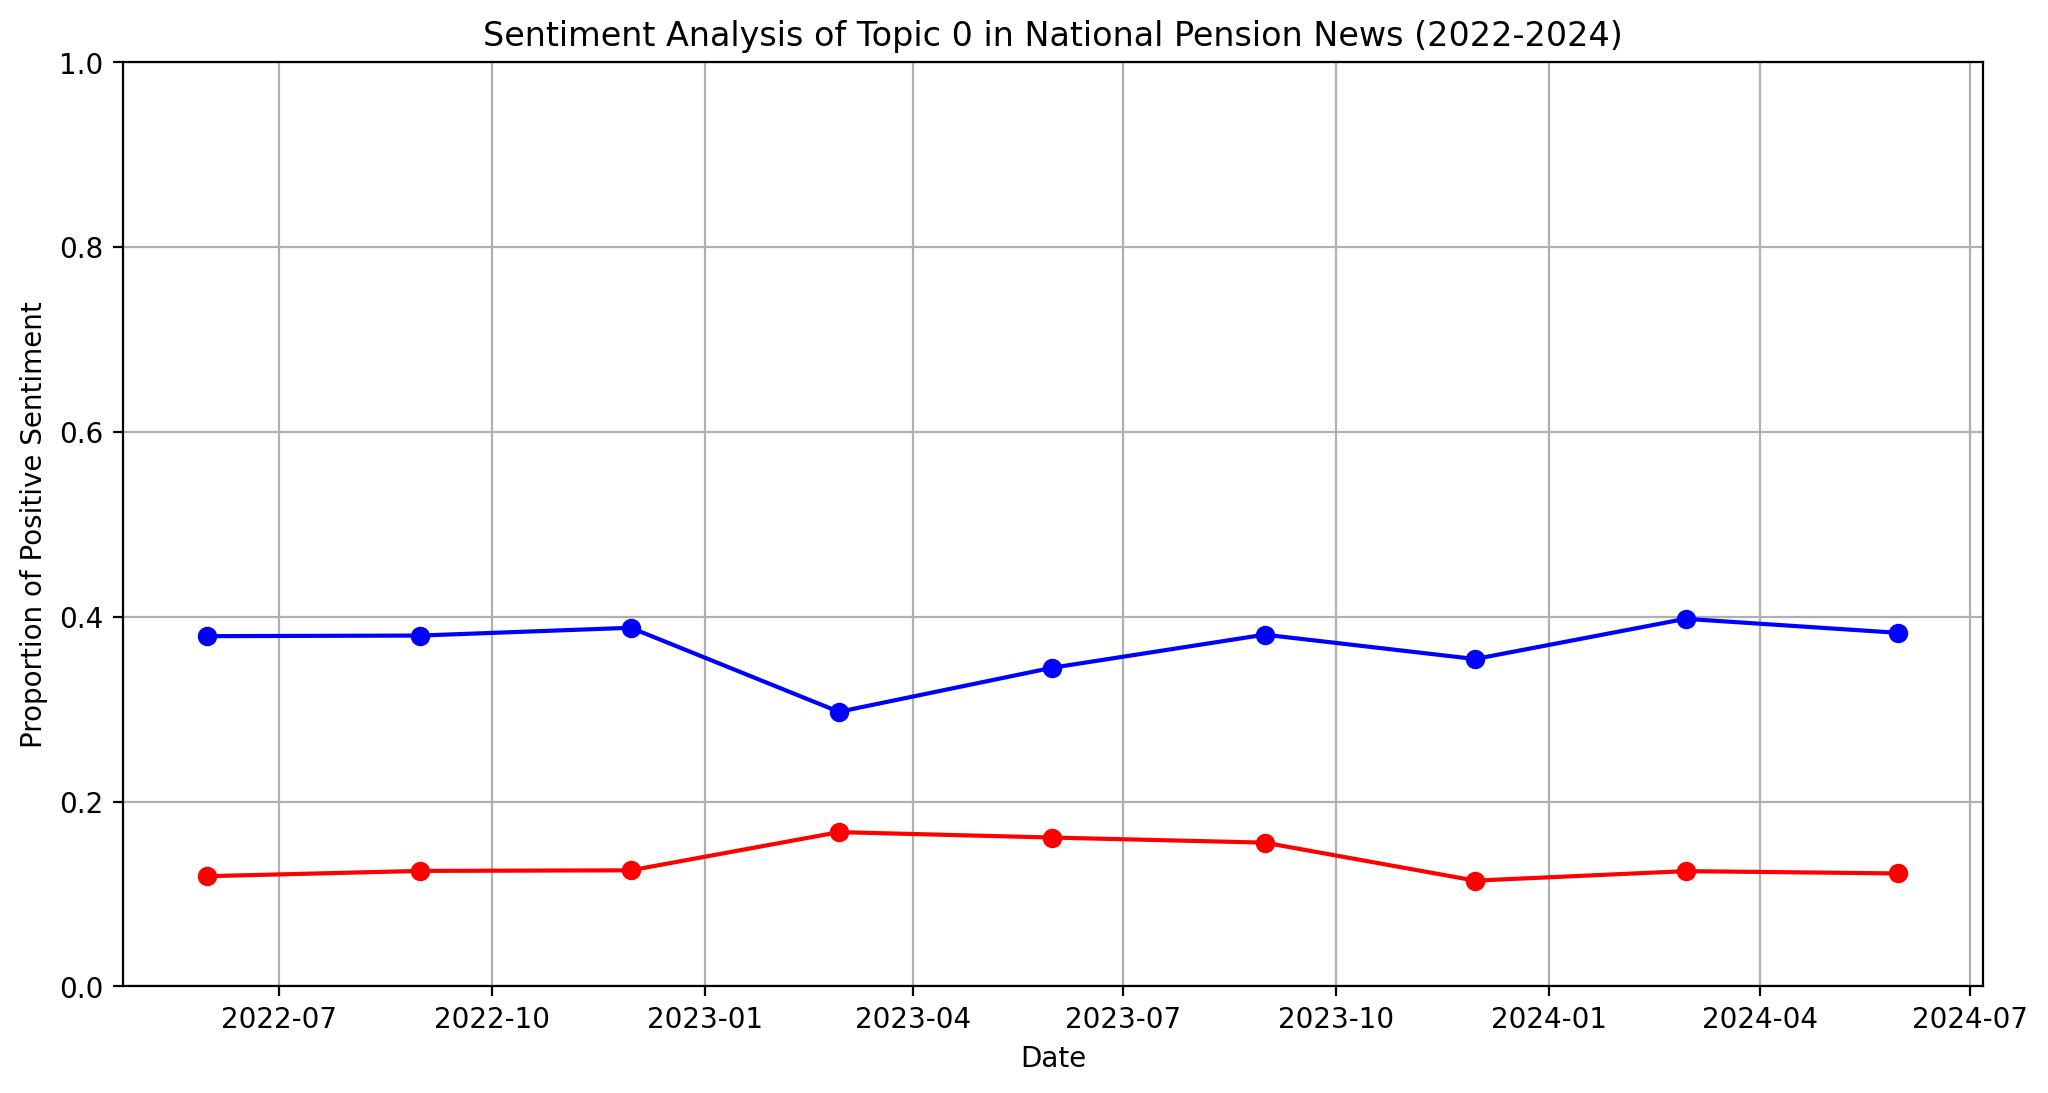

In [76]:
# 1. 데이터 로드
# 감성분석 및 토픽 분류가 완료된 데이터 로드
topic_sentiment_data = df.copy()

# 새 원본 데이터 로드 (날짜 데이터 포함)
original_data = df.copy()

# 2. 고유 식별자 생성
# 예시로 'title'과 'doc'을 기준으로 고유 식별자를 생성
original_data['uid'] = original_data['title'] + original_data['doc']
topic_sentiment_data['uid'] = topic_sentiment_data['title'] + topic_sentiment_data['doc']

# 3. 데이터 병합
merged_data = pd.merge(topic_sentiment_data, original_data[['uid', 'published_date']], on='uid', how='left')

# 4. 결측값 처리
merged_data.dropna(subset=['published_date_x'], inplace=True)


# 5. 데이터 전처리
start_date = '2022-05-01'
end_date = '2024-04-30'
filtered_data = merged_data[(merged_data['published_date_y'] >= start_date) & (merged_data['published_date_y'] <= end_date)]

# 특정 토픽에 대한 데이터 필터링 (예: topic 1)
topic_data = filtered_data[(filtered_data['doc_topic'] == 5) | (filtered_data['doc_topic'] == 4) | (filtered_data['doc_topic'] == 3) | (filtered_data['doc_topic'] == 2) | (filtered_data['doc_topic'] == 1) | (filtered_data['doc_topic'] == 0)]

# 3개월 단위로 데이터 그룹화
topic_data.set_index('published_date_y', inplace=True)
grouped_data = topic_data.resample('3M').apply(lambda x: (x['sentiment'] == 1).mean())

# 6. 감성 분석 결과 계산
# 그룹 내에서 긍정적인 문서 비율 계산은 이미 apply에서 처리됨
# 7. 시계열 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(grouped_data.index, grouped_data, marker='o', linestyle='-', color='blue')
plt.plot(topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean()).index, topic_data.resample('3M').apply(lambda x: (x['sentiment'] == -1).mean()), marker='o', linestyle='-', color='red')
plt.title('Sentiment Analysis of Topic 5 in National Pension News (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Proportion of Positive Sentiment')
plt.grid(True)
plt.ylim(0,1)
plt.show()
